In [312]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap


In [231]:
# df_1 = df[df['pilot_number'] == 1]
# len(set(df_1['participant']))

In [535]:
scaler = StandardScaler()

df = pd.read_csv('pilot_TOTAL_TEST_merged.csv')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/2492389180.py:3: DtypeWarning: Columns (254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pilot_TOTAL_TEST_merged.csv')


In [536]:
df['Tested - Untested IT Distractor Similarity']

0       -0.166242
1        0.331804
2        0.979385
3        1.435688
4       -0.945028
           ...   
82495    0.181079
82496    0.490479
82497    1.458302
82498    1.133201
82499    1.465615
Name: Tested - Untested IT Distractor Similarity, Length: 82500, dtype: float64

In [537]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [538]:
# df = remove_unit_variance(df,'mouse.time_last','participant')
# df['analysis_rt'] = df['mouse.time_last_within']

In [539]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [540]:
df['Distractor V2 Similarity Preference Tested']

0          Tested
1          Tested
2        Untested
3        Untested
4          Tested
           ...   
82495    Untested
82496    Untested
82497      Tested
82498    Untested
82499      Tested
Name: Distractor V2 Similarity Preference Tested, Length: 82500, dtype: object

In [541]:

column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
# df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
# df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
# df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
# df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
# df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
# df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
# df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
# df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


In [550]:


df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')




df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

def round_to_significant_figures(x, sig_figs=2):
    if x == 0:
        return 0
    else:
        return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


def process_interval(interval):
    # Round both bounds
    lower_rounded = round_to_significant_figures(interval.left)
    upper_rounded = round_to_significant_figures(interval.right)
    # Return a new interval with the rounded bounds
    return pd.Interval(lower_rounded, upper_rounded)

df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']





In [551]:
len(set(df['participant']))

271

In [552]:
df_correct = df[df['resp_correct'] == 1]


In [553]:
df

setup_js.started  setup_js.stopped  participant  \
0                   NaN               NaN       116851   
1                   NaN               NaN       116851   
2                   NaN               NaN       116851   
3                   NaN               NaN       116851   
4                   NaN               NaN       116851   
...                 ...               ...          ...   
82495               NaN               NaN       171304   
82496               NaN               NaN       171304   
82497               NaN               NaN       171304   
82498               NaN               NaN       171304   
82499               NaN               NaN       171304   

                          date     expName psychopyVersion        OS  \
0      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
1      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
2      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
3      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
4      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
...                        ...         ...             ...       ...   
82495  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82496  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82497  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82498  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82499  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   

       frameRate  Instructions1.started  Instructions1.stopped  ...  \
0       59.52381                    NaN                    NaN  ...   
1       59.52381                    NaN                    NaN  ...   
2       59.52381                    NaN                    NaN  ...   
3       59.52381                    NaN                    NaN  ...   
4       59.52381                    NaN                    NaN  ...   
...          ...                    ...                    ...  ...   
82495   59.88024                    NaN                    NaN  ...   
82496   59.88024                    NaN                    NaN  ...   
82497   59.88024                    NaN                    NaN  ...   
82498   59.88024                    NaN                    NaN  ...   
82499   59.88024                    NaN                    NaN  ...   

       v2_sim_dis_diff_test_sq_cat  it_sim_dis_diff_test_sq_cat  \
0                                                 Least Similar   
1                    Least Similar                Least Similar   
2                                                                 
3                                                  Most Similar   
4                     Most Similar                                
...                            ...                          ...   
82495                                             Least Similar   
82496                                                             
82497                                              Most Similar   
82498                                                             
82499                 Most Similar                 Most Similar   

       IT_diff_binned_sq   V2_diff_binned_sq  IT_diff_binned_test_sq  \
0         (-0.55, -0.45]    (0.0011, 0.0087]          (-0.55, -0.45]   
1         (-0.55, -0.45]   (-0.011, -0.0079]          (-0.55, -0.45]   
2         (-0.26, 0.042]  (-0.0079, -0.0044]          (-0.26, 0.043]   
3           (0.44, 0.94]  (-0.0079, -0.0044]            (0.45, 0.96]   
4         (-0.26, 0.042]     (0.0087, 0.019]          (-0.26, 0.043]   
...                  ...                 ...                     ...   
82495     (-0.55, -0.45]  (-0.0079, -0.0044]          (-0.55, -0.45]   
82496     (-0.45, -0.26]    (0.0011, 0.0087]          (-0.45, -0.26]   
82497       (0.44, 0.94]   (-0.0044, 0.0011]            (0.45, 0.96]   
82498      (0.042, 0.44]   (-0.0044, 0.0011]           (0.043, 0.45

In [554]:
sns.set_context('notebook')

In [555]:
df["Tested - Untested IT Distractor Similarity"]

0       -0.166242
1        0.331804
2        0.979385
3        1.435688
4       -0.945028
           ...   
82495    0.181079
82496    0.490479
82497    1.458302
82498    1.133201
82499    1.465615
Name: Tested - Untested IT Distractor Similarity, Length: 82500, dtype: float64

<Figure size 1000x600 with 0 Axes>

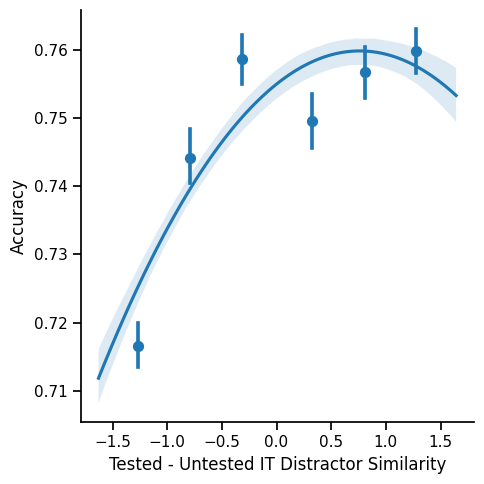

In [556]:
single_color = palette[0]  # Use the first color from the palette
single_color_palette = [single_color]


plt.figure(figsize=(10, 6))
sns.lmplot(
    x="Tested - Untested IT Distractor Similarity",
    y='Accuracy',
    x_bins = 6,
    order = 2,
    ci = 68,
    data=df
)

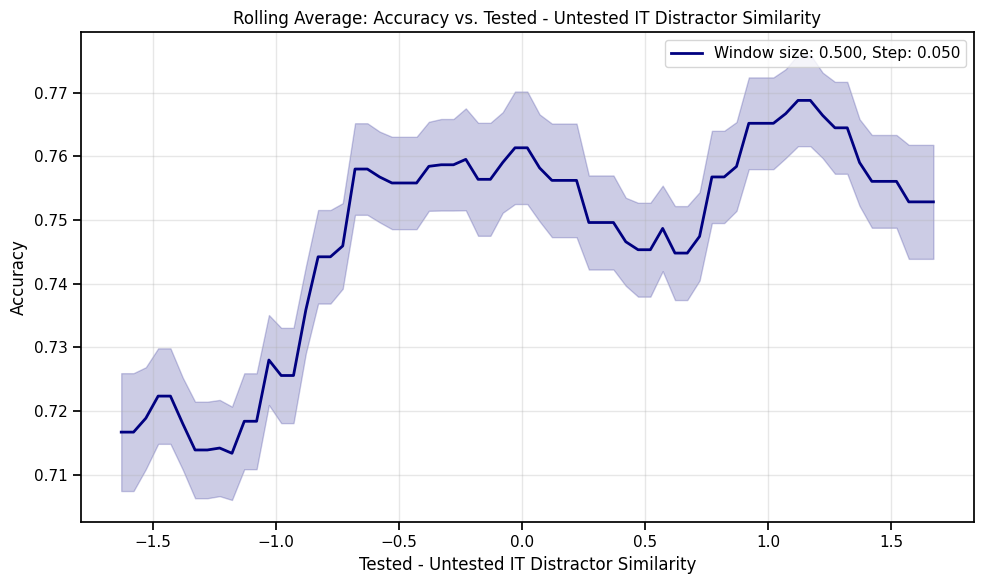

In [557]:
def basic_sliding_window(df, x_col="Tested - Untested IT Distractor Similarity", 
                         y_col='Accuracy', window_size=0.01, step_size=0.001):
    
    # Basic sliding window approach with fixed window size and step.
    
    plt.figure(figsize=(10, 6))
    
    # Get x range
    x_min = df[x_col].min()
    x_max = df[x_col].max()
    
    # Create evaluation points
    eval_points = np.arange(x_min, x_max + step_size, step_size)
    
    # Arrays to store results
    x_values = []
    y_values = []
    y_errors = []
    n_points = []
    
    for x_center in eval_points:
        window_data = df[(df[x_col] >= x_center - window_size/2) & 
                         (df[x_col] <= x_center + window_size/2)]
        
        if len(window_data) >= 5:
            mean_y = window_data[y_col].mean()
            std_y = window_data[y_col].std()
            sem_y = std_y / np.sqrt(len(window_data))
            
            x_values.append(x_center)
            y_values.append(mean_y)
            y_errors.append(sem_y)
            n_points.append(len(window_data))
    
    x_values = np.array(x_values)
    y_values = np.array(y_values)
    y_errors = np.array(y_errors)
    
    plt.plot(x_values, y_values, color='navy', linewidth=2, 
             label=f'Window size: {window_size:.3f}, Step: {step_size:.3f}')
    
    plt.fill_between(x_values, 
                     y_values - 1.96 * y_errors,
                     y_values + 1.96 * y_errors,
                     color='navy', alpha=0.2)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Rolling Average: {y_col} vs. {x_col}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt


basic_sliding_window(df, 'Tested - Untested IT Distractor Similarity', 'Accuracy', 0.5, 0.05)


plt.show()

In [558]:
# basic_sliding_window(df, 'IT_diff_binned_test', 'rt', 0.5, 0.15)


<module 'matplotlib.pyplot' from '/Users/lana/.pyenv/versions/3.8.10/lib/python3.8/site-packages/matplotlib/pyplot.py'>

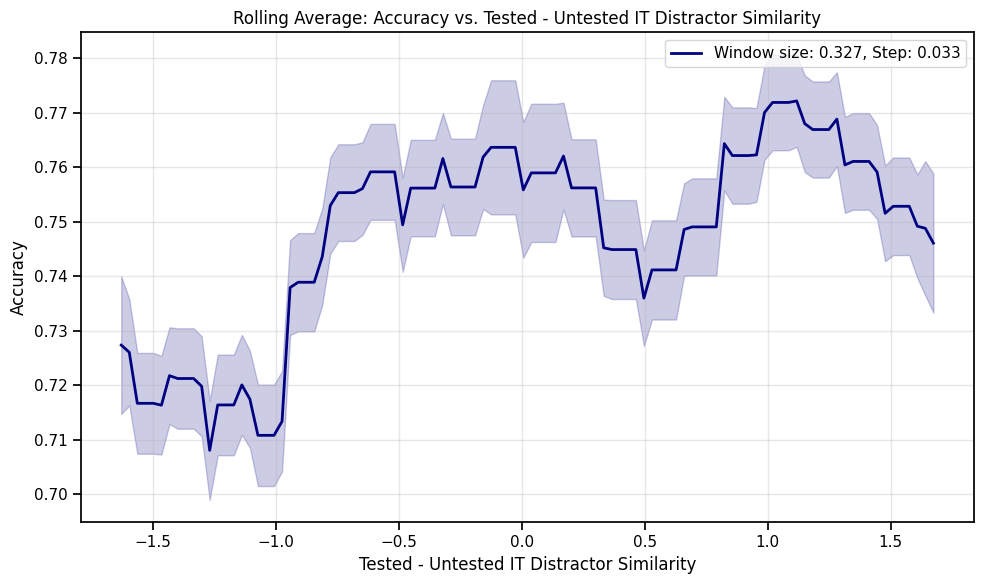

In [559]:
basic_sliding_window(df, 'Tested - Untested IT Distractor Similarity', 'Accuracy', 0.327, 0.0327)


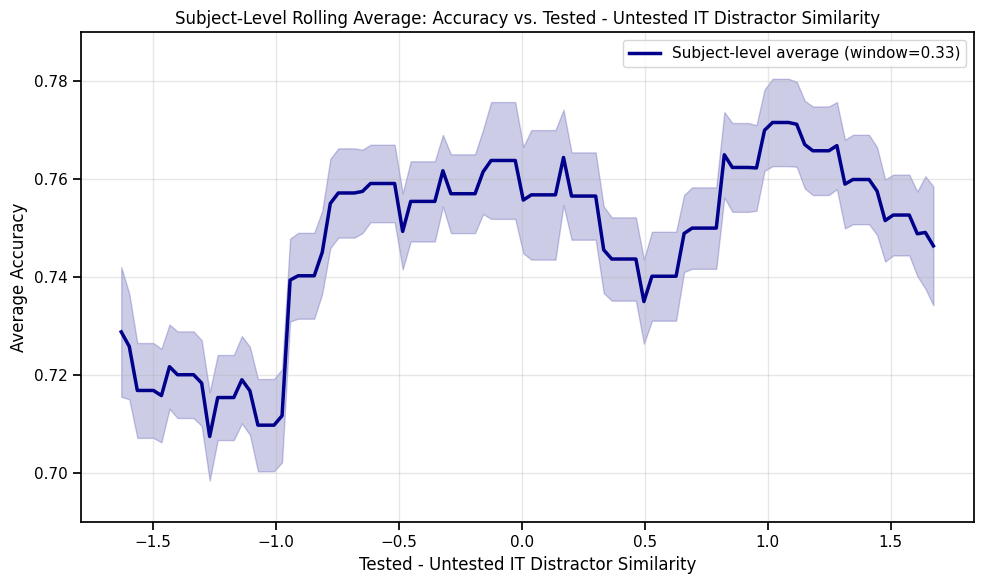

In [560]:
def sliding_window_subject_averages(df, x_col="Tested - Untested IT Distractor Similarity", 
                                   y_col='Accuracy', subject_col='participant',
                                   window_size=0.2, step_size=0.02):
   
    x_min = df[x_col].min()
    x_max = df[x_col].max()
    
    eval_points = np.arange(x_min, x_max + step_size, step_size)
    
    x_values = []
    y_means = []
    y_errors = []
    n_subjects = []
    
    for x_center in eval_points:
        window_data = df[(df[x_col] >= x_center - window_size/2) & 
                         (df[x_col] <= x_center + window_size/2)]
        
        if len(window_data) == 0:
            continue
            
        subjects_in_window = window_data[subject_col].unique()
        
        if len(subjects_in_window) < 3:
            continue
        
        subject_means = []
        
        for subject in subjects_in_window:
            subject_data = window_data[window_data[subject_col] == subject]
            subject_mean = subject_data[y_col].mean()
            subject_means.append(subject_mean)
        
        subject_means = np.array(subject_means)
        
        overall_mean = np.mean(subject_means)
        sem = np.std(subject_means, ddof=1) / np.sqrt(len(subject_means))
        
        x_values.append(x_center)
        y_means.append(overall_mean)
        y_errors.append(sem)
        n_subjects.append(len(subject_means))
    
    x_values = np.array(x_values)
    y_means = np.array(y_means)
    y_errors = np.array(y_errors)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(x_values, y_means, color='darkblue', linewidth=2.5, 
             label=f'Subject-level average (window={window_size:.2f})')
    
    plt.fill_between(x_values, 
                     y_means - 1.96 * y_errors,
                     y_means + 1.96 * y_errors,
                     color='darkblue', alpha=0.2)
    
  
    plt.xlabel(x_col)
    plt.ylabel(f'Average {y_col}')
    plt.title(f'Subject-Level Rolling Average: {y_col} vs. {x_col}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        plt.ylim(0.69, 0.79)     
    plt.tight_layout()
    
    return plt

sliding_window_subject_averages(
    df, 
    x_col="Tested - Untested IT Distractor Similarity",
    y_col='Accuracy',
    subject_col='participant',
    window_size=0.327,  
    step_size=0.0327    
)

plt.show()

# Will get evaluation points, then identify window, unique subjects in this window,
# then calculate average for each subject, then calculates  mean and standard error across subjects

In [561]:
def grouped_window_analysis(df, x_col="Tested - Untested IT Distractor Similarity", 
                           y_col='Accuracy',
                           window_size=0.2, step_size=0.02):
   
    # Group all data by participants first, calculate 
    # similarity-accuracy relationships separately for each participant, 
    # then average these relationships.

    # In code calculated each subjects sliding window results first, now that we have sliding window results 
    # for each participant, we'll average across these at evaluation ( window border ) points
    
    subject_col='participant'
    x_min = df[x_col].min()
    x_max = df[x_col].max()
    eval_points = np.arange(x_min, x_max + step_size, step_size)
    subjects = df[subject_col].unique()
    
    subject_results = {subject: {'x': [], 'y': []} for subject in subjects}
    
    for subject in subjects:
        subject_data = df[df[subject_col] == subject]
        
        if len(subject_data) < 1:#normally 10?
            continue
            
        for x_center in eval_points:
            window_data = subject_data[(subject_data[x_col] >= x_center - window_size/2) & 
                                     (subject_data[x_col] <= x_center + window_size/2)]
            
            if len(window_data) >= 1:#normally 5?
                mean_y = window_data[y_col].mean()
                subject_results[subject]['x'].append(x_center)
                subject_results[subject]['y'].append(mean_y)
    
    x_values = []
    y_means = []
    y_errors = []
    n_subjects = []
    
    for x_center in eval_points:
        y_values_at_x = []
        
        for subject in subjects:
            if x_center in subject_results[subject]['x']:
                idx = subject_results[subject]['x'].index(x_center)
                y_values_at_x.append(subject_results[subject]['y'][idx])
        
        if len(y_values_at_x) >= 1:# 3 at least?
            x_values.append(x_center)
            y_means.append(np.mean(y_values_at_x))
            y_errors.append(np.std(y_values_at_x, ddof=1) / np.sqrt(len(y_values_at_x)))
            n_subjects.append(len(y_values_at_x))
    
    x_values = np.array(x_values)
    y_means = np.array(y_means)
    y_errors = np.array(y_errors)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(x_values, y_means, color='darkblue', linewidth=2.5, 
             label=f'Group average (window={window_size:.2f})')
    
    plt.fill_between(x_values, 
                     y_means - 1.96 * y_errors,
                     y_means + 1.96 * y_errors,
                     color='darkblue', alpha=0.2)
    
    
    plt.xlabel(x_col)
    plt.ylabel(f'Average {y_col}')
    plt.title(f'Grouped Window Analysis: {y_col} vs. {x_col}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        plt.ylim(0.69, 0.79)  
    
    plt.tight_layout()
    
    return plt

<module 'matplotlib.pyplot' from '/Users/lana/.pyenv/versions/3.8.10/lib/python3.8/site-packages/matplotlib/pyplot.py'>

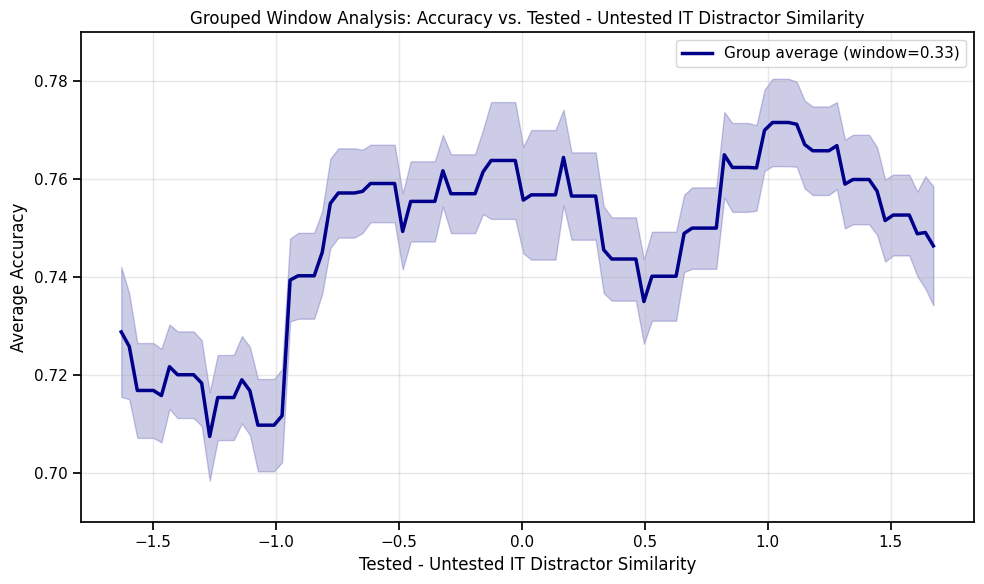

In [562]:
grouped_window_analysis(df, "Tested - Untested IT Distractor Similarity", 
                           'Accuracy', window_size=0.327, step_size=0.0327)

<module 'matplotlib.pyplot' from '/Users/lana/.pyenv/versions/3.8.10/lib/python3.8/site-packages/matplotlib/pyplot.py'>

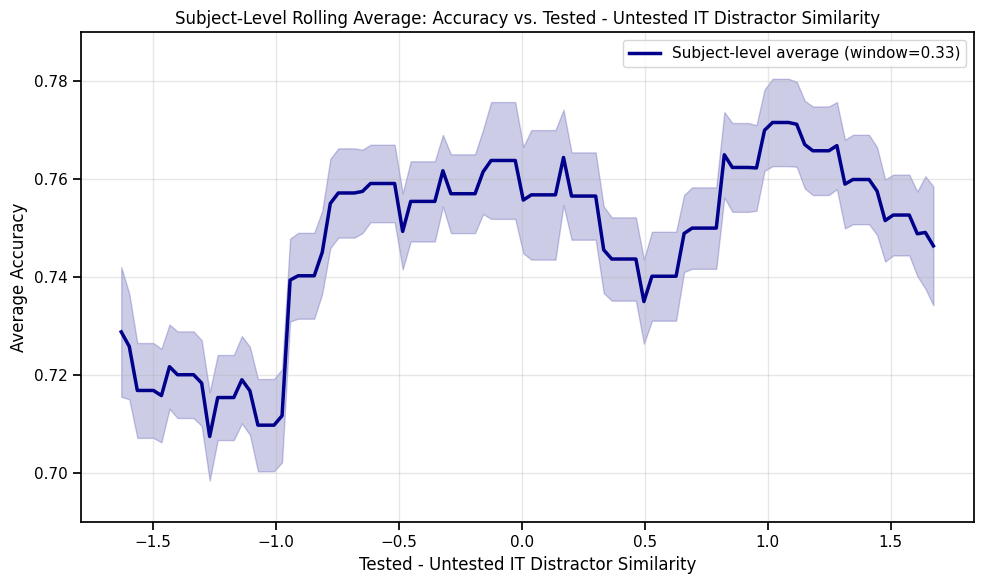

In [563]:
sliding_window_subject_averages(
    df,"Tested - Untested IT Distractor Similarity",'Accuracy',subject_col='participant',
    window_size=0.327,  step_size=0.0327    )


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/2813311261.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


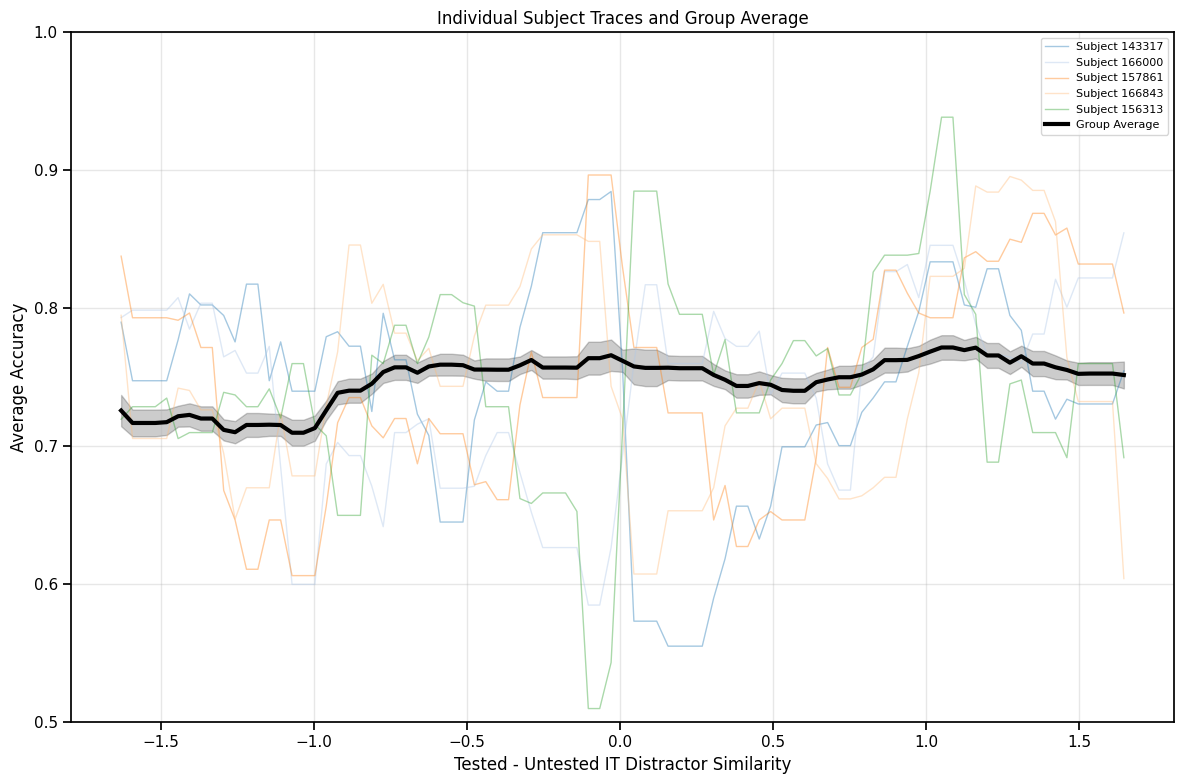

In [564]:
def individual_traces_analysis(df, x_col="Tested - Untested IT Distractor Similarity", 
                              y_col='Accuracy', subject_col='participant',
                              window_size=0.2, step_size=0.02, max_subjects=20):
    
    # Plot separate sliding window curves for each participant and 
    # then an additional curve showing their average.
    
    from matplotlib.cm import get_cmap
    
    x_min = df[x_col].min()
    x_max = df[x_col].max()
    
    eval_points = np.arange(x_min, x_max + step_size, step_size)
    
    all_subjects = df[subject_col].unique()
    
    valid_subjects = []
    for subject in all_subjects:
        if len(df[df[subject_col] == subject]) >= 1:
            valid_subjects.append(subject)
    
    if len(valid_subjects) > max_subjects:
        np.random.seed(42) 
        plot_subjects = np.random.choice(valid_subjects, max_subjects, replace=False)
    else:
        plot_subjects = valid_subjects
    
    subject_results = {subject: {'x': [], 'y': []} for subject in valid_subjects}
    
    for subject in valid_subjects:
        subject_data = df[df[subject_col] == subject]
        
        # For each evaluation point
        for x_center in eval_points:
            # Find data points within window
            window_data = subject_data[(subject_data[x_col] >= x_center - window_size/2) & 
                                     (subject_data[x_col] <= x_center + window_size/2)]
            
            # Only calculate if enough points
            if len(window_data) >= 3:
                mean_y = window_data[y_col].mean()
                subject_results[subject]['x'].append(x_center)
                subject_results[subject]['y'].append(mean_y)
    
    # Calculate average curve across all subjects
    # Initialize arrays for each evaluation point
    avg_results = {x: [] for x in eval_points}
    
    # Collect values from all subjects
    for subject in valid_subjects:
        for x, y in zip(subject_results[subject]['x'], subject_results[subject]['y']):
            avg_results[x].append(y)
    
    x_avg = []
    y_avg = []
    y_sem = []
    
    for x_center in eval_points:
        if len(avg_results[x_center]) >= 3:
            x_avg.append(x_center)
            y_avg.append(np.mean(avg_results[x_center]))
            y_sem.append(np.std(avg_results[x_center], ddof=1) / np.sqrt(len(avg_results[x_center])))
    
    plt.figure(figsize=(12, 8))
    
    cmap = get_cmap('tab20')
    
    for i, subject in enumerate(plot_subjects):
        color = cmap(i % 20)  
        x_vals = subject_results[subject]['x']
        y_vals = subject_results[subject]['y']
        
        if len(x_vals) > 1:  
            plt.plot(x_vals, y_vals, color=color, alpha=0.4, linewidth=1,
                    label=f'Subject {subject}' if i < 10 else None)  # Limit legend entries
    
    plt.plot(x_avg, y_avg, color='black', linewidth=3, label='Group Average')
    
    plt.fill_between(x_avg, 
                     np.array(y_avg) - 1.96 * np.array(y_sem),
                     np.array(y_avg) + 1.96 * np.array(y_sem),
                     color='black', alpha=0.2)
    
    plt.xlabel(x_col)
    plt.ylabel(f'Average {y_col}')
    plt.title(f'Individual Subject Traces and Group Average')
    plt.grid(True, alpha=0.3)
    
    plt.legend(loc='upper right', fontsize=8)
    
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        plt.ylim(0.5, 1)  # Adjust as needed
    
    plt.tight_layout()
    
    return plt

individual_traces_analysis(
    df, 
    x_col="Tested - Untested IT Distractor Similarity",
    y_col='Accuracy',
    subject_col='participant',
    window_size=0.372,
    step_size=0.0372,
    max_subjects=5  # Adjust based on how many individual traces you want to see
)

plt.show()

In [565]:
def simple_sliding_window_points(df, x_col="Tested - Untested IT Distractor Similarity", 
                         y_col='Accuracy', window_points=10, step_points=2):
    
    plt.figure(figsize=(10, 6))
    
    sorted_df = df.sort_values(by=x_col).reset_index(drop=True)
    
    total_points = len(sorted_df)
    
    window_points = min(window_points, total_points)
    
    x_values = [] 
    y_values = []  
    y_errors = []  
    
    # Slide window across the data points
    for i in range(0, total_points - window_points + 1, step_points):
        window = sorted_df.iloc[i:i+window_points]
        
        mean_x = window[x_col].mean()
        mean_y = window[y_col].mean()
        
        std_y = window[y_col].std()
        sem_y = std_y / np.sqrt(window_points)
        
        x_values.append(mean_x)
        y_values.append(mean_y)
        y_errors.append(sem_y)
    
    x_values = np.array(x_values)
    y_values = np.array(y_values)
    y_errors = np.array(y_errors)
    
    plt.plot(x_values, y_values, color='navy', linewidth=2.5)
    
    plt.fill_between(x_values, 
                     y_values - 1.96 * y_errors,
                     y_values + 1.96 * y_errors,
                     color='navy', alpha=0.2)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Rolling Average of {y_col} ({window_points} points per window), step size of {step_points}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt



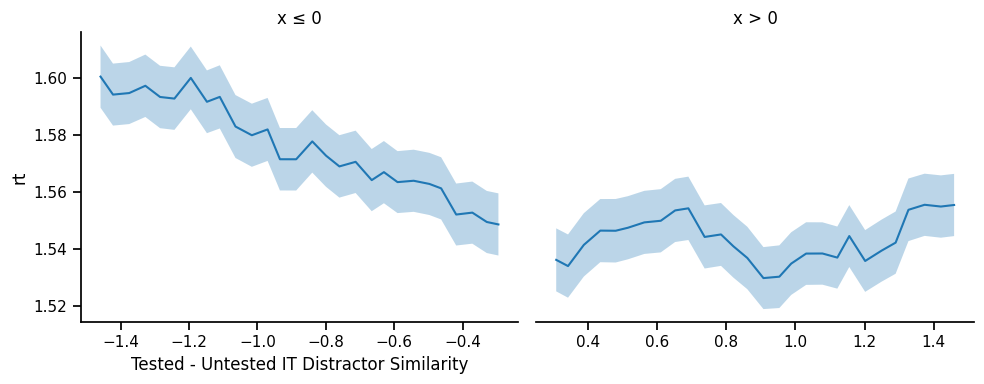

In [566]:
def plot_sliding_window_true_split(df, x_col, y_col='Accuracy', window_points=10, step_points=2):
    # First split the dataframe
    df_neg = df[df[x_col] <= 0].sort_values(by=x_col).reset_index(drop=True)
    df_pos = df[df[x_col] > 0].sort_values(by=x_col).reset_index(drop=True)
    
    # Process negative values
    x_neg, y_neg, err_neg = [], [], []
    n_neg = len(df_neg)
    window_points_neg = min(window_points, n_neg)
    
    for i in range(0, n_neg - window_points_neg + 1, step_points):
        window = df_neg.iloc[i : i + window_points_neg]
        x_neg.append(window[x_col].mean())
        y_neg.append(window[y_col].mean())
        err_neg.append(window[y_col].std() / np.sqrt(window_points_neg))
    
    # Process positive values (separately)
    x_pos, y_pos, err_pos = [], [], []
    n_pos = len(df_pos)
    window_points_pos = min(window_points, n_pos)
    
    for i in range(0, n_pos - window_points_pos + 1, step_points):
        window = df_pos.iloc[i : i + window_points_pos]
        x_pos.append(window[x_col].mean())
        y_pos.append(window[y_col].mean())
        err_pos.append(window[y_col].std() / np.sqrt(window_points_pos))
    
    # Convert to numpy arrays
    x_neg, y_neg, err_neg = np.array(x_neg), np.array(y_neg), np.array(err_neg)
    x_pos, y_pos, err_pos = np.array(x_pos), np.array(y_pos), np.array(err_pos)
    
    # Create the split plot
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
    # Plot negative side
    ax_left.plot(x_neg, y_neg)
    ax_left.fill_between(x_neg, y_neg - 1.96 * err_neg, y_neg + 1.96 * err_neg, alpha=0.3)
    ax_left.set_title("x ≤ 0")
    ax_left.set_xlabel(x_col)
    ax_left.set_ylabel(y_col)
    
    # Plot positive side
    ax_right.plot(x_pos, y_pos)
    ax_right.fill_between(x_pos, y_pos - 1.96 * err_pos, y_pos + 1.96 * err_pos, alpha=0.3)
    ax_right.set_title("x > 0")
    ax_right.set_xlabel("")
    ax_right.yaxis.set_visible(False)
    
    # Style the plot
    ax_right.spines['left'].set_visible(False)
    ax_left.spines['right'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['top'].set_visible(False)
    ax_left.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()


# and you might also play around with trying to include both this rolling average and the model fits
# on the same plot, 
# e.g., the rolling average lighter in the background, and the model fit bolder in front)
plot_sliding_window_true_split(df_correct, "Tested - Untested IT Distractor Similarity", 'rt', 8250, 825)


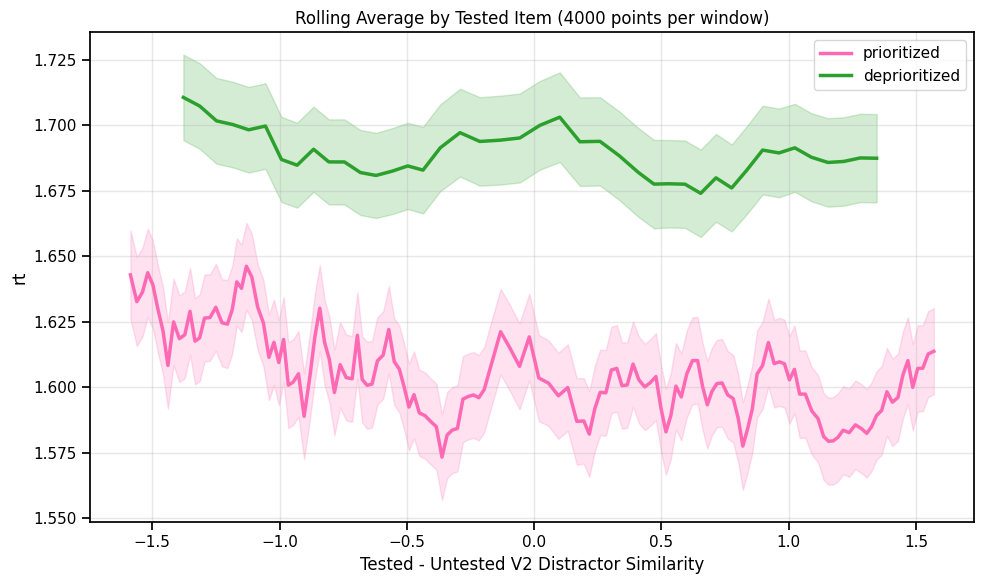

In [567]:
def simple_sliding_window_by_item(df, x_col="Tested - Untested IT Distractor Similarity", 
                                y_col='Accuracy', item_col='Tested Item',
                                window_points=10, step_points=2):
    # Creates a simple sliding window visualization with separate lines for different tested items.
    
    plt.figure(figsize=(10, 6))
    
    tested_items = df[item_col].unique()
    
    color_map = {
        'prioritized': '#FF69B4',    # Pink
        'deprioritized': '#2ca02c',  # Green
    }
    
    default_colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
    
    for i, item in enumerate(tested_items):
        df_item = df[df[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
        
        if len(df_item) < window_points:
            print(f"Skipping {item} - insufficient data points ({len(df_item)} < {window_points})")
            continue
            
        x_values = []
        y_values = []
        y_errors = []
        
        total_points = len(df_item)
        item_window_points = min(window_points, total_points)
        
        # Slide window across the data points
        for j in range(0, total_points - item_window_points + 1, step_points):
            window = df_item.iloc[j:j+item_window_points]
            
            mean_x = window[x_col].mean()
            mean_y = window[y_col].mean()
            
            std_y = window[y_col].std()
            sem_y = std_y / np.sqrt(item_window_points)
            
            x_values.append(mean_x)
            y_values.append(mean_y)
            y_errors.append(sem_y)
        
        x_values = np.array(x_values)
        y_values = np.array(y_values)
        y_errors = np.array(y_errors)
        
        if len(x_values) == 0:
            continue
        
        item_lower = str(item).lower()
        if item_lower in color_map:
            color = color_map[item_lower]
        elif 'prioritized' in item_lower:
            color = color_map['prioritized']
        elif 'deprioritized' in item_lower:
            color = color_map['deprioritized']
        else:
            color = default_colors[i % len(default_colors)]
        
        plt.plot(x_values, y_values, color=color, linewidth=2.5, label=f'{item}')
        
        plt.fill_between(x_values, 
                         y_values - 1.96 * y_errors,
                         y_values + 1.96 * y_errors,
                         color=color, alpha=0.2)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Rolling Average by {item_col} ({window_points} points per window)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        plt.ylim(0.6, 0.82)
    
    plt.tight_layout()
    
    return plt

simple_sliding_window_by_item(
    df, 
    x_col="Tested - Untested V2 Distractor Similarity",
    y_col='rt',
    item_col='Tested Item',
    window_points=4000,
    step_points=400
)

plt.show()

In [568]:
def plot_sliding_window_double_split(df, x_col="Tested - Untested IT Distractor Similarity", 
                                    y_col='Accuracy', item_col='Tested Item', 
                                    window_points=10, step_points=2):

    # Creates a sliding window visualization that:
    # 1. Splits the data at x=0 (negative vs positive)
    # 2. Within each split, creates separate lines for different tested items
    
    df_neg = df[df[x_col] <= 0].copy()
    df_pos = df[df[x_col] > 0].copy()
    
    tested_items = df[item_col].unique()
    
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    default_colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
    color_map = {
        'prioritized': '#FF69B4',    # Pink
        'deprioritized': '#2ca02c',  # Green
    }
    for side, df_side, ax in [('negative', df_neg, ax_left), ('positive', df_pos, ax_right)]:
        for i, item in enumerate(tested_items):
            df_item = df_side[df_side[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
            
            if len(df_item) < window_points:
                continue
                
            x_vals, y_vals, y_errs = [], [], []
            n_item = len(df_item)
            item_window_points = min(window_points, n_item)
            
            for j in range(0, n_item - item_window_points + 1, step_points):
                window = df_item.iloc[j : j + item_window_points]
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                sem_y = window[y_col].std() / np.sqrt(item_window_points)
                
                x_vals.append(mean_x)
                y_vals.append(mean_y)
                y_errs.append(sem_y)
            
            x_vals = np.array(x_vals)
            y_vals = np.array(y_vals)
            y_errs = np.array(y_errs)
            
            if len(x_vals) == 0:
                continue
            
            item_lower = str(item).lower()
            if item_lower in color_map:
                color = color_map[item_lower]
            elif 'prioritized' in item_lower:
                color = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                color = color_map['deprioritized']
            else:
                color = default_colors[i % len(default_colors)]
            
            ax.plot(x_vals, y_vals, color=color, label=f'{item}', linewidth=2)
            ax.fill_between(x_vals, 
                           y_vals - 1.96 * y_errs,
                           y_vals + 1.96 * y_errs,
                           color=color, alpha=0.2)
    
    ax_left.set_title(f"x ≤ 0")
    ax_right.set_title(f"x > 0")
    
    ax_left.set_xlabel(x_col)
    ax_right.set_xlabel(x_col)
    
    ax_left.set_ylabel(y_col)
    ax_right.yaxis.set_visible(False)
    
    ax_right.spines['left'].set_visible(False)
    ax_left.spines['right'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['top'].set_visible(False)
    ax_left.spines['top'].set_visible(False)
    
    ax_right.legend(loc='best')
    
    
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        y_min = 0.63
        y_max = 0.83
        ax_left.set_ylim(y_min, y_max)
    
    plt.tight_layout()
    return fig



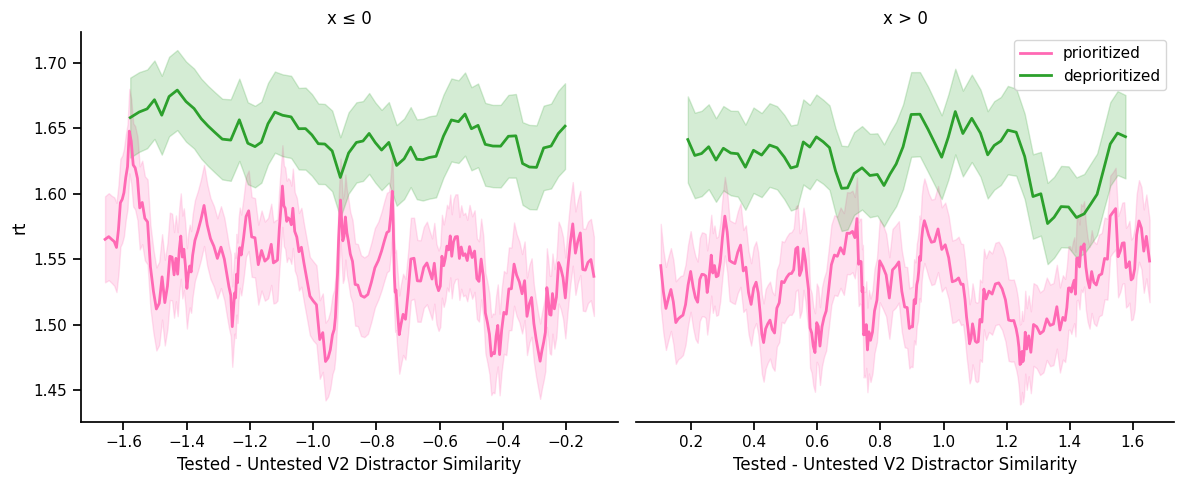

In [569]:
fig = plot_sliding_window_double_split(
    df_correct, 
    x_col="Tested - Untested V2 Distractor Similarity",
    y_col='rt',
    item_col='Tested Item',  
    window_points=1000,
    step_points=100
)

plt.show()

In [570]:
df_int = df[df['Tested Item'] == 'deprioritized']
df_int

setup_js.started  setup_js.stopped  participant  \
2                   NaN               NaN       116851   
4                   NaN               NaN       116851   
6                   NaN               NaN       116851   
7                   NaN               NaN       116851   
10                  NaN               NaN       116851   
...                 ...               ...          ...   
82478               NaN               NaN       171304   
82483               NaN               NaN       171304   
82485               NaN               NaN       171304   
82490               NaN               NaN       171304   
82495               NaN               NaN       171304   

                          date     expName psychopyVersion        OS  \
2      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
4      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
6      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
7      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
10     2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
...                        ...         ...             ...       ...   
82478  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82483  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82485  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82490  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   
82495  2025-01-29 19:25:41.828  WM_Deepgen        2023.2.1  MacIntel   

       frameRate  Instructions1.started  Instructions1.stopped  ...  \
2       59.52381                    NaN                    NaN  ...   
4       59.52381                    NaN                    NaN  ...   
6       59.52381                    NaN                    NaN  ...   
7       59.52381                    NaN                    NaN  ...   
10      59.52381                    NaN                    NaN  ...   
...          ...                    ...                    ...  ...   
82478   59.88024                    NaN                    NaN  ...   
82483   59.88024                    NaN                    NaN  ...   
82485   59.88024                    NaN                    NaN  ...   
82490   59.88024                    NaN                    NaN  ...   
82495   59.88024                    NaN                    NaN  ...   

       v2_sim_dis_diff_test_sq_cat  it_sim_dis_diff_test_sq_cat  \
2                                                                 
4                     Most Similar                                
6                     Most Similar                                
7                     Most Similar                Least Similar   
10                                                 Most Similar   
...                            ...                          ...   
82478                 Most Similar                Least Similar   
82483                Least Similar                Least Similar   
82485                Least Similar                 Most Similar   
82490                                                             
82495                                             Least Similar   

       IT_diff_binned_sq   V2_diff_binned_sq  IT_diff_binned_test_sq  \
2         (-0.26, 0.042]  (-0.0079, -0.0044]          (-0.26, 0.043]   
4         (-0.26, 0.042]     (0.0087, 0.019]          (-0.26, 0.043]   
6          (0.042, 0.44]     (0.0087, 0.019]           (0.043, 0.45]   
7         (-0.55, -0.45]     (0.0087, 0.019]          (-0.55, -0.45]   
10          (0.44, 0.94]  (-0.0079, -0.0044]            (0.45, 0.96]   
...                  ...                 ...                     ...   
82478     (-0.55, -0.45]     (0.0087, 0.019]          (-0.55, -0.45]   
82483     (-0.55, -0.45]   (-0.011, -0.0079]          (-0.55, -0.45]   
82485       (0.44, 0.94]   (-0.011, -0.0079]            (0.45, 0.96]   
82490     (-0.45, -0.26]    (0.0011, 0.0087]          (-0.45, -0.26

<module 'matplotlib.pyplot' from '/Users/lana/.pyenv/versions/3.8.10/lib/python3.8/site-packages/matplotlib/pyplot.py'>

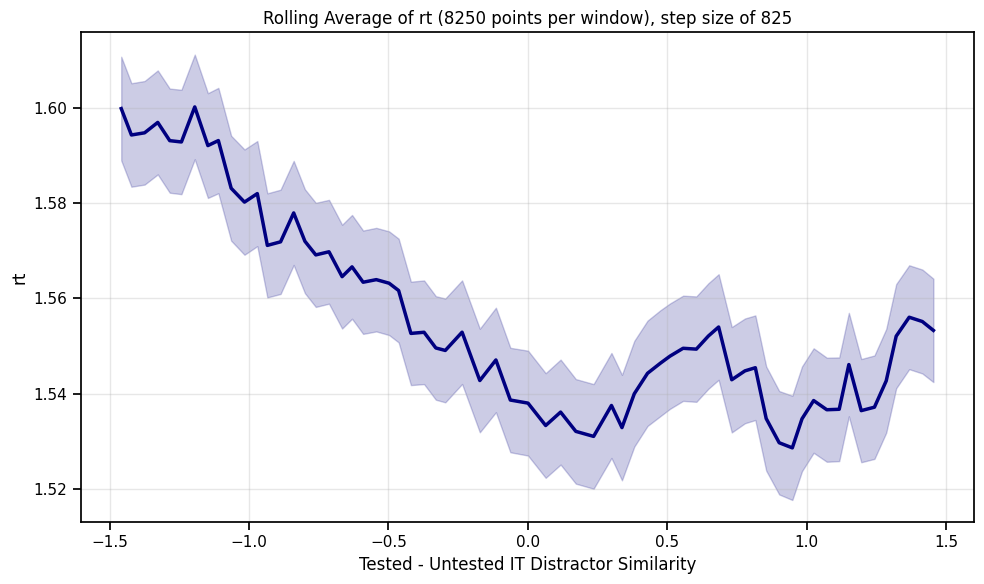

In [571]:
simple_sliding_window_points(
    df_correct,
    x_col="Tested - Untested IT Distractor Similarity",
    y_col='rt',
    window_points=8250,  # Number of points in each window
    step_points=825      # Move window by this many points each step
)

In [322]:
def point_based_sequential_averaging(df, x_col="Tested - Untested IT Distractor Similarity", 
                                    y_col='Accuracy',
                                    window_points=50, step_points=10):
    # Sequential Averaging with Point-Based Windows
    # First creates windows with fixed numbers of points, then averages by subject within each window.

    ## Gets a window,  calculates mean similarity value for this window, individual means per participant
    ## in a given window, then gets overall mean for the window
    subject_col='participant'
    sorted_df = df.sort_values(by=x_col).reset_index(drop=True)
    
    total_points = len(sorted_df)
    
    x_values = []
    y_means = []
    y_errors = []
    n_subjects = []
    
    for i in range(0, total_points - window_points + 1, step_points):
        window = sorted_df.iloc[i:i+window_points]
        
        mean_x = window[x_col].mean()
        
        subjects_in_window = window[subject_col].unique()
        
        if len(subjects_in_window) >= 1:
            subject_means = []
            
            for subject in subjects_in_window:
                subject_data = window[window[subject_col] == subject]
                if len(subject_data) > 0:  
                    subject_mean = subject_data[y_col].mean()
                    subject_means.append(subject_mean)
            
            if subject_means:
                overall_mean = np.mean(subject_means)
                sem = np.std(subject_means, ddof=1) / np.sqrt(len(subject_means))
                
                x_values.append(mean_x)
                y_means.append(overall_mean)
                y_errors.append(sem)
                n_subjects.append(len(subject_means))
    
    x_values = np.array(x_values)
    y_means = np.array(y_means)
    y_errors = np.array(y_errors)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(x_values, y_means, color='darkblue', linewidth=2.5, 
             label=f'Subject-level average ({window_points} points/window)')
    
    plt.fill_between(x_values, 
                     y_means - 1.96 * y_errors,
                     y_means + 1.96 * y_errors,
                     color='darkblue', alpha=0.2)
    
    plt.xlabel(x_col)
    plt.ylabel(f'Average {y_col}')
    plt.title(f'Approach 1: Sequential Averaging with Point-Based Windows')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        y_min = max(0.5, np.min(y_means) - 0.005)
        y_max = min(1.0, np.max(y_means) + 0.005)
        plt.ylim(y_min, y_max)
    
    plt.tight_layout()
    
    return plt




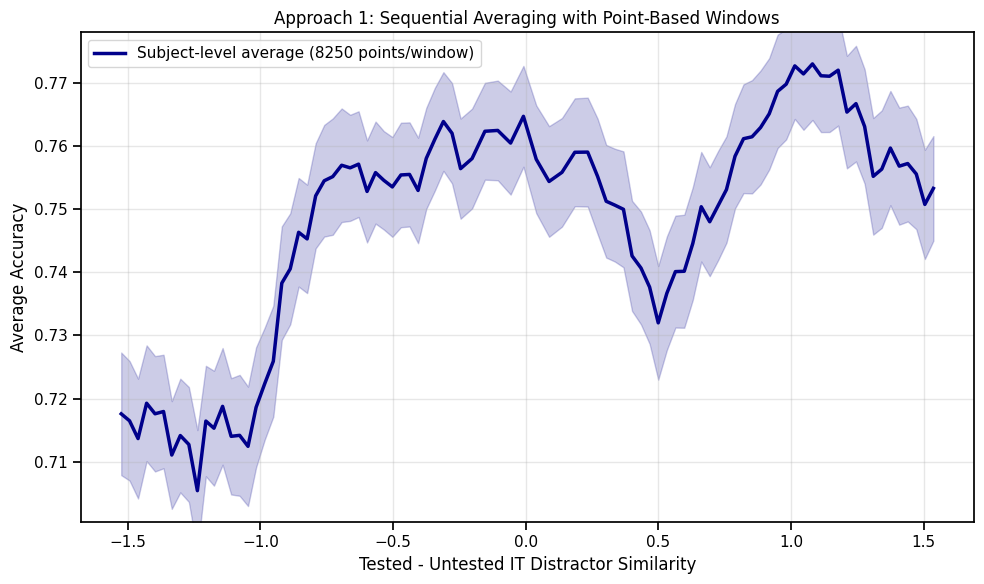

In [572]:
point_based_sequential_averaging(
    df, 
    x_col="Tested - Untested IT Distractor Similarity",
    y_col='Accuracy',
    window_points=8250,  
    step_points=825     
)

plt.show()


In [573]:
def individual_traces_total_points(df, x_col="Tested - Untested IT Distractor Similarity", 
                                 y_col='Accuracy',
                                 window_points=50, step_points=10, max_subjects=15, y_min = 0.5, y_max = 1):
    # Individual traces approach where each window contains a fixed total number of points,
    # and traces for individual subjects are plotted along with the group average.
    subject_col='participant'

    sorted_df = df.sort_values(by=x_col).reset_index(drop=True)
    
    # Total number of points and subjects
    total_points = len(sorted_df)
    all_subjects = sorted_df[subject_col].unique()
    
    # Ensure window parameters are valid
    window_points = min(window_points, total_points)
    step_points = min(step_points, window_points)
    
    # Store subject data at each window position
    window_positions = []
    subject_data_at_windows = []
    
    # Slide window across the data points
    for i in range(0, total_points - window_points + 1, step_points):
        # Get current window
        window = sorted_df.iloc[i:i+window_points]
        window_center = window[x_col].mean()
        
        # Get data for each subject in this window
        subject_means = {}
        for subject in window[subject_col].unique():
            subject_data = window[window[subject_col] == subject]
            if len(subject_data) > 0:
                subject_means[subject] = {
                    'mean_y': subject_data[y_col].mean(),
                    'count': len(subject_data)
                }
        
        window_positions.append(window_center)
        subject_data_at_windows.append(subject_means)
    
    subject_counts = {subject: 0 for subject in all_subjects}
    for window_data in subject_data_at_windows:
        for subject in window_data:
            subject_counts[subject] = subject_counts.get(subject, 0) + 1
    
    min_windows = max(3, len(window_positions) // 4)
    valid_subjects = [s for s, count in subject_counts.items() if count >= min_windows]
    
    if len(valid_subjects) > max_subjects:
        np.random.seed(42)  
        plot_subjects = np.random.choice(valid_subjects, max_subjects, replace=False)
    else:
        plot_subjects = valid_subjects
    
    plt.figure(figsize=(12, 8))
    
    cmap = get_cmap('tab20')
    
    subject_lines = {subject: {'x': [], 'y': []} for subject in valid_subjects}
    group_data = {'x': window_positions, 'y': [], 'sem': [], 'n': []}
    
    for i, (x_pos, window_data) in enumerate(zip(window_positions, subject_data_at_windows)):
        window_y_values = []
        
        for subject in valid_subjects:
            if subject in window_data:
                subject_lines[subject]['x'].append(x_pos)
                subject_lines[subject]['y'].append(window_data[subject]['mean_y'])
                
                window_y_values.append(window_data[subject]['mean_y'])
        
        if len(window_y_values) >= 1:
            group_data['y'].append(np.mean(window_y_values))
            group_data['sem'].append(np.std(window_y_values, ddof=1) / np.sqrt(len(window_y_values)))
            group_data['n'].append(len(window_y_values))
    
    for i, subject in enumerate(plot_subjects):
        x = subject_lines[subject]['x']
        y = subject_lines[subject]['y']
        
        if len(x) >= 5:
            idx = np.argsort(x)
            x = np.array(x)[idx]
            y = np.array(y)[idx]
            
            color = cmap(i % 20)
            plt.plot(x, y, color=color, alpha=0.4, linewidth=1, 
                     label=f'Subject {subject}' if i < 10 else None)
    
    group_x = np.array(group_data['x'])
    group_y = np.array(group_data['y'])
    group_sem = np.array(group_data['sem'])
    
    idx = np.argsort(group_x)
    group_x = group_x[idx]
    group_y = group_y[idx]
    group_sem = group_sem[idx]
    
    plt.plot(group_x, group_y, color='black', linewidth=3, 
             label=f'Group Average ({window_points} points/window)')
    
    plt.fill_between(group_x, 
                     group_y - 1.96 * group_sem,
                     group_y + 1.96 * group_sem,
                     color='black', alpha=0.2)
    
    plt.xlabel(x_col)
    plt.ylabel(f'Average {y_col}')
    plt.title(f'Individual Traces and Group Average')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best', fontsize=8)
    
    # # Set y-axis limits for accuracy data
    # if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
    #     valid_y = []
    #     for subject in valid_subjects:
    #         valid_y.extend(subject_lines[subject]['y'])
        
    #     if valid_y:
    #         y_min = max(0.5, min(valid_y) - 0.05)
    #         y_max = min(1.0, max(valid_y) + 0.05)
    plt.ylim(y_min, y_max)
    
    plt.tight_layout()
    
    return plt



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/2701250033.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


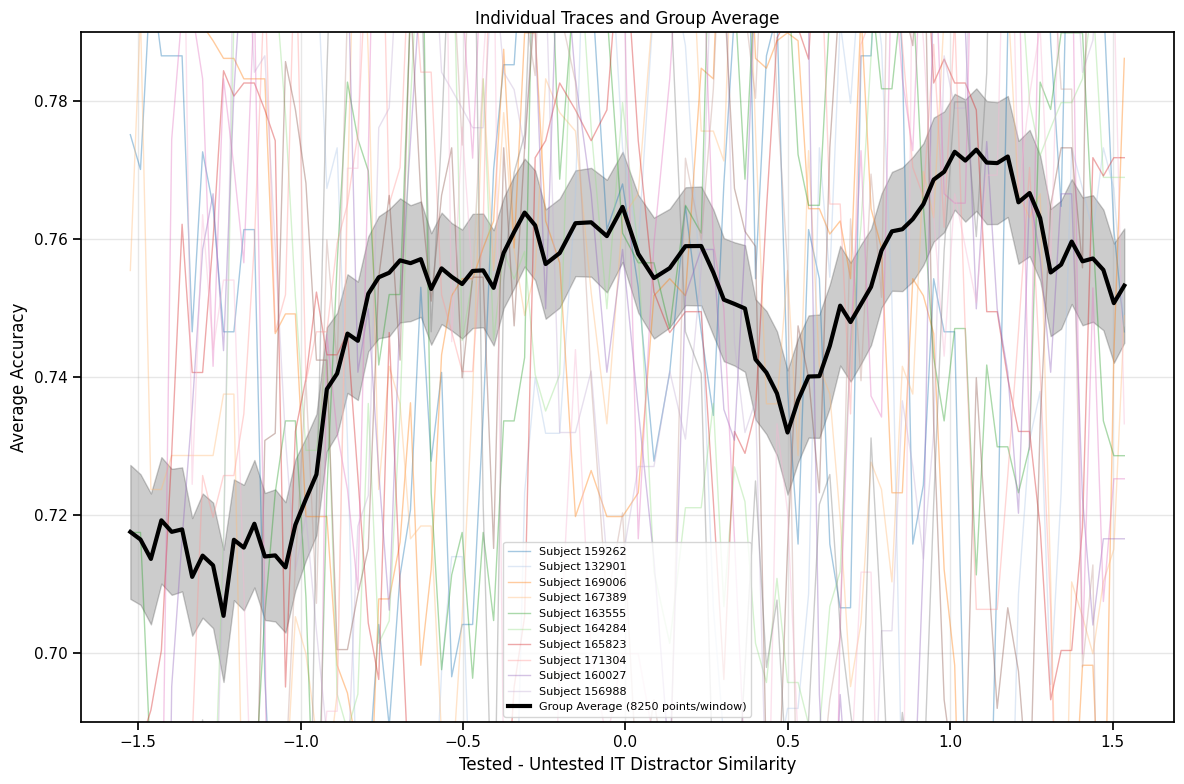

In [574]:
individual_traces_total_points(
    df, "Tested - Untested IT Distractor Similarity", 'Accuracy',
    8250, 825, 15,y_min = 0.69, y_max = 0.79  )

plt.show()

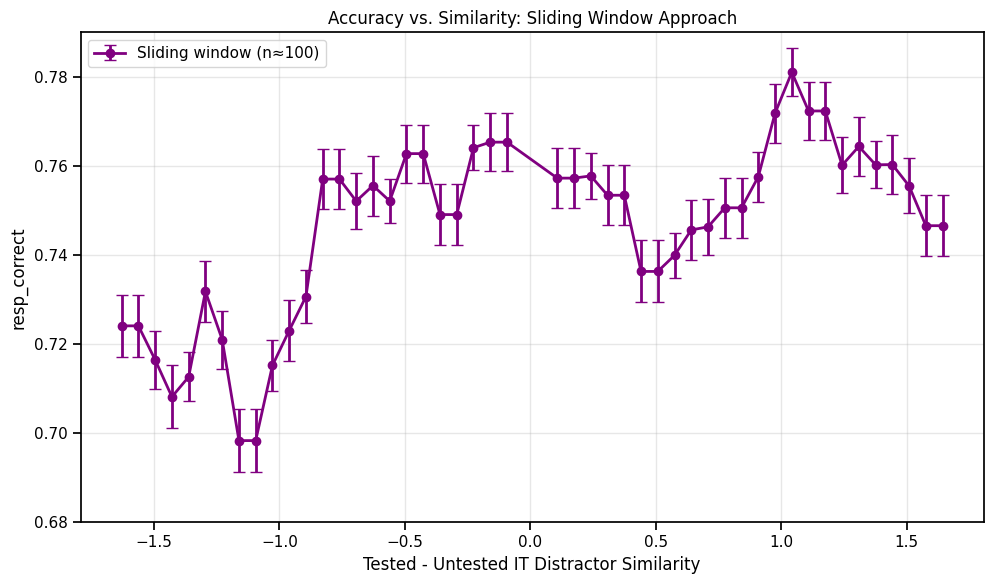

In [575]:
def plot_simple_sliding_window(df, similarity_col='Tested - Untested IT Distractor Similarity', 
                              accuracy_col='resp_correct', window_size=300, 
                              num_windows=30, save_fig=False):
   
    plt.figure(figsize=(10, 6))
    
    sorted_df = df.sort_values(by=similarity_col).reset_index(drop=True)
    
    min_sim = sorted_df[similarity_col].min()
    max_sim = sorted_df[similarity_col].max()
    
    window_centers = np.linspace(min_sim, max_sim, num_windows)
    
    x_values = []
    y_values = []
    y_errors = []
    
    for center in window_centers:
        half_range = (max_sim - min_sim) / (num_windows * 0.7)  
        window_data = sorted_df[(sorted_df[similarity_col] >= center - half_range) & 
                               (sorted_df[similarity_col] <= center + half_range)]
        
        if len(window_data) >= 5: 
            mean_accuracy = window_data[accuracy_col].mean()
            std_accuracy = window_data[accuracy_col].std()
            sem_accuracy = std_accuracy / np.sqrt(len(window_data))
            
            x_values.append(center)
            y_values.append(mean_accuracy)
            y_errors.append(sem_accuracy)
    
    # Plot the points and line
    plt.errorbar(x_values, y_values, yerr=y_errors, fmt='o-', color='purple', 
                linewidth=2, markersize=6, capsize=4, 
                label=f'Sliding window (n≈{window_size})')
    
    plt.scatter(df[similarity_col], df[accuracy_col], color='gray', alpha=0.1, s=10)
    
    plt.xlabel(similarity_col)
    plt.ylabel(accuracy_col)
    plt.title('Accuracy vs. Similarity: Sliding Window Approach')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.ylim(-0.05, 1.05)
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig('sliding_window.png', dpi=300)
    
    return plt

plot_simple_sliding_window(
    df, 
    similarity_col='Tested - Untested IT Distractor Similarity',
    accuracy_col='resp_correct', 
    window_size=100,  
    num_windows=50    # Number of evaluation points (similar to bins but overlapping)
)
plt.ylim(0.68, 0.79) 

# Show the plot
plt.show()

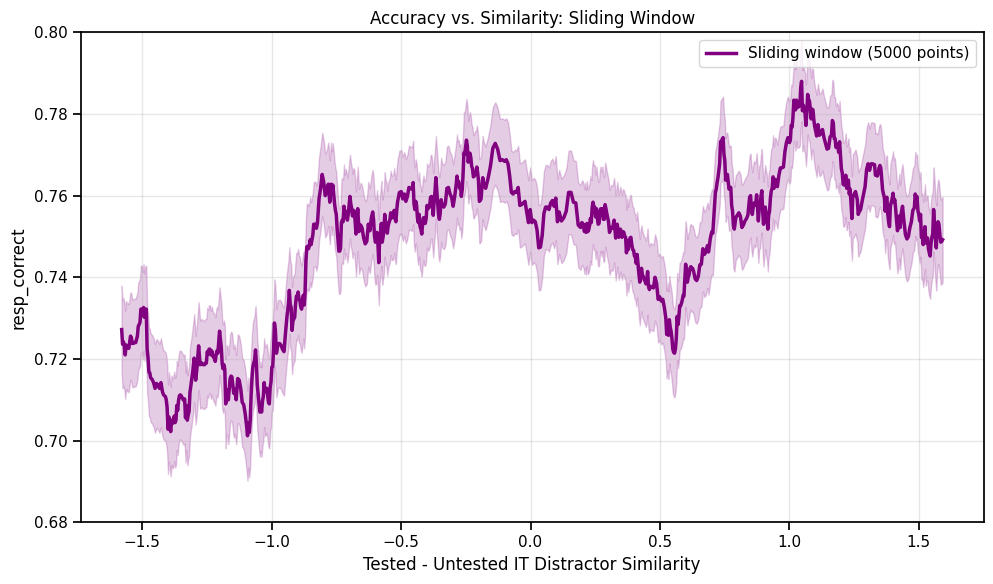

In [576]:
def plot_sliding_window_points(df, similarity_col='Tested - Untested IT Distractor Similarity', 
                              accuracy_col='resp_correct', window_size=100, 
                              step_size=10, save_fig=False):
    
    plt.figure(figsize=(10, 6))
    
    sorted_df = df.sort_values(by=similarity_col).reset_index(drop=True)
    
    total_points = len(sorted_df)
    
    window_size = min(window_size, total_points)
    
    x_values = []
    y_values = []
    y_errors = []
    
    for i in range(0, total_points - window_size + 1, step_size):
        window = sorted_df.iloc[i:i+window_size]
        
        mean_sim = window[similarity_col].mean()
        
        mean_acc = window[accuracy_col].mean()
        std_acc = window[accuracy_col].std()
        sem_acc = std_acc / np.sqrt(window_size)
        
        x_values.append(mean_sim)
        y_values.append(mean_acc)
        y_errors.append(sem_acc)
    
    x_values = np.array(x_values)
    y_values = np.array(y_values)
    y_errors = np.array(y_errors)
    
    sort_idx = np.argsort(x_values)
    x_values = x_values[sort_idx]
    y_values = y_values[sort_idx]
    y_errors = y_errors[sort_idx]
    
    plt.plot(x_values, y_values, color='purple', linewidth=2.5, 
             label=f'Sliding window ({window_size} points)')
    
    plt.fill_between(x_values, 
                    np.clip(y_values - 1.7 * y_errors, 0, 1),
                    np.clip(y_values + 1.7 * y_errors, 0, 1),
                    color='purple', alpha=0.2)
    
    plt.xlabel(similarity_col)
    plt.ylabel(accuracy_col)
    plt.title('Accuracy vs. Similarity: Sliding Window')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.ylim(-0.05, 1.05)
    
    plt.tight_layout()
   
    return plt

plot_sliding_window_points(
    df, 
    similarity_col='Tested - Untested IT Distractor Similarity',
    accuracy_col='resp_correct', 
    window_size=5000,  
    step_size=100       
)
plt.ylim(0.68, 0.8) 

# Show the plot
plt.show()
# df

In [577]:

# window based on the x-axis values (with size defined in units of x)
# Takes all points within ±half_window of each x-value point
 # Evaluates at 100 evenly spaced points across the x-axis
# will use many points in dense regions and fewer in sparse regions since it's based on x-axis distance
# gives equal weight to each region of the x-axis regardless of data density.
x_window_size = 0.5

df_sorted = df_it_pos.sort_values('Tested - Untested IT Distractor Similarity')

x_col = 'Tested - Untested IT Distractor Similarity'
y_col = 'Accuracy'
x_values = df_sorted[x_col].values
y_values = df_sorted[y_col].values

x_min = x_values.min()
x_max = x_values.max()
x_points = np.linspace(x_min, x_max, 1000)

y_points = []
half_window = x_window_size / 2

for x_point in x_points:
    window_mask = (x_values >= x_point - half_window) & (x_values <= x_point + half_window)
    if np.any(window_mask):
        avg = np.mean(y_values[window_mask])
        y_points.append(avg)
    else:
        y_points.append(np.nan)  

plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, '-', color='blue', linewidth=2)

plt.title(f'Average Accuracy vs IT Distractor Relative Similarity (Window Size: {x_window_size})')
plt.xlabel('Tested - Untested IT Distractor Similarity')
plt.ylabel('Average Accuracy')
plt.grid(True, alpha=0.3)

plt.axhline(y=np.mean(y_values), color='red', linestyle='--', 
            label=f'Global Average: {np.mean(y_values):.3f}')
plt.legend()

plt.ylim(0.72, 0.78) 
plt.show()

NameError: name 'df_it_pos' is not defined

<module 'matplotlib.pyplot' from '/Users/lana/.pyenv/versions/3.8.10/lib/python3.8/site-packages/matplotlib/pyplot.py'>

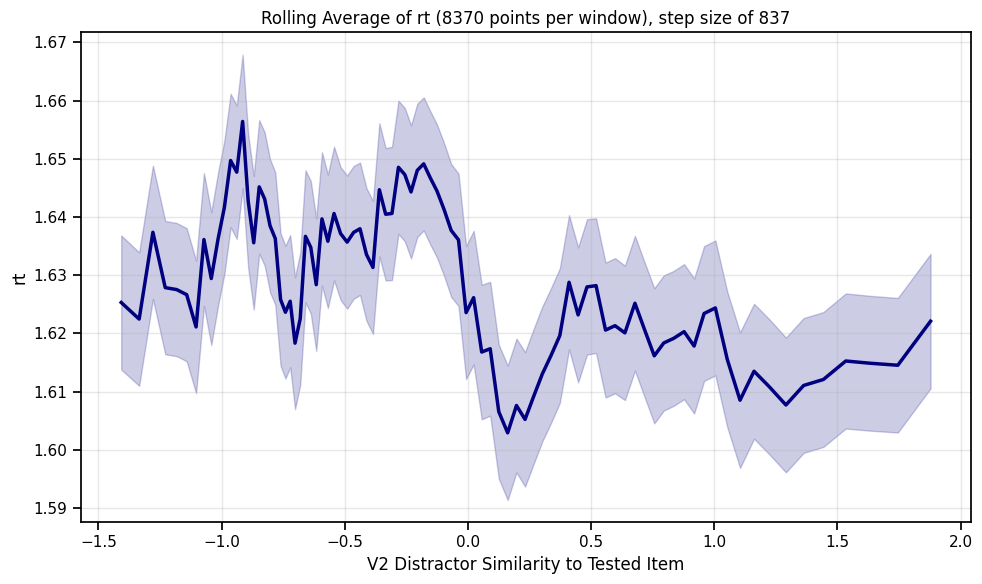

In [578]:
simple_sliding_window_points(df, 'V2 Distractor Similarity to Tested Item', 
                         'rt', 8370, 837)

<Figure size 1000x600 with 0 Axes>

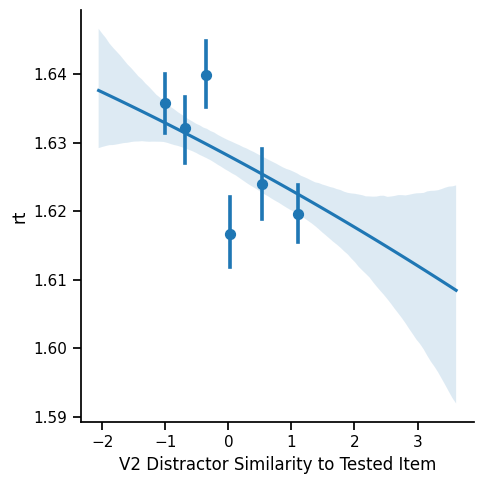

In [549]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='rt',
    # hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order

    data=df
)


<Figure size 1000x600 with 0 Axes>

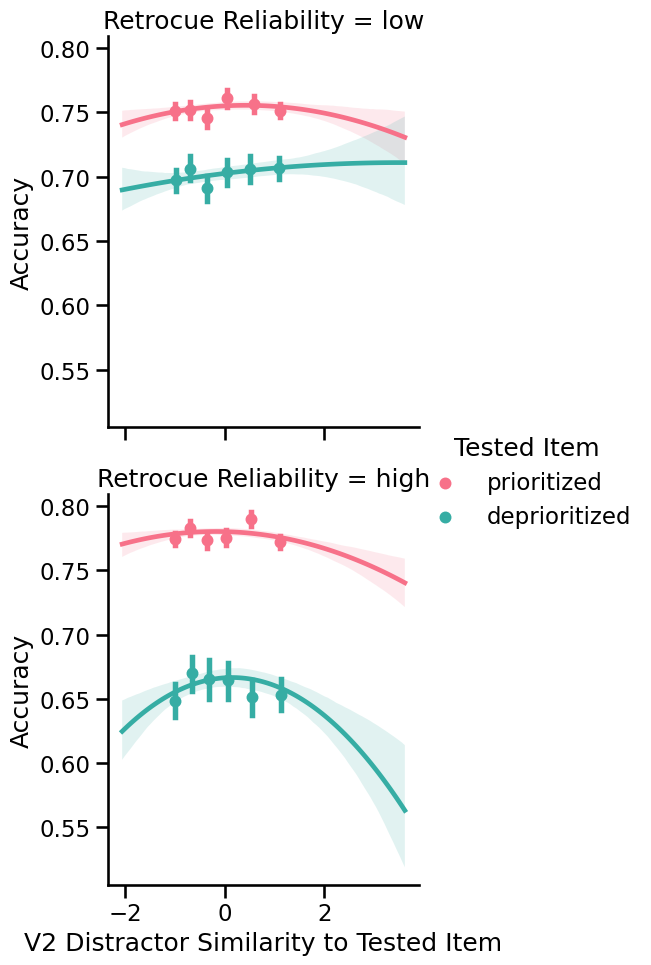

In [453]:


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    row = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order

    data=df
)


In [454]:
df['Tested - Untested IT Distractor Similarity']

0       -0.166242
1        0.331804
2        0.979385
3        1.435688
4       -0.945028
           ...   
82495    0.181079
82496    0.490479
82497    1.458302
82498    1.133201
82499    1.465615
Name: Tested - Untested IT Distractor Similarity, Length: 82500, dtype: float64

<Figure size 1000x600 with 0 Axes>

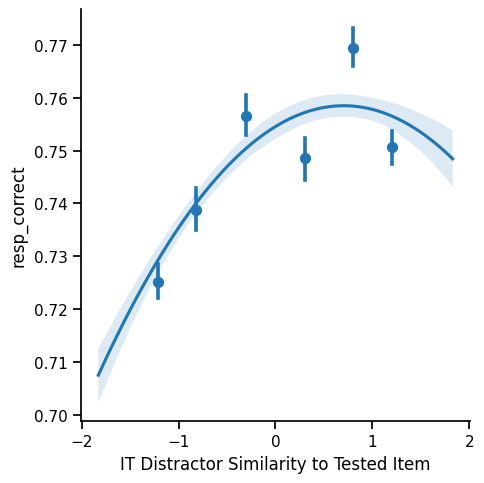

In [595]:


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

plt.show()

<Figure size 1000x600 with 0 Axes>

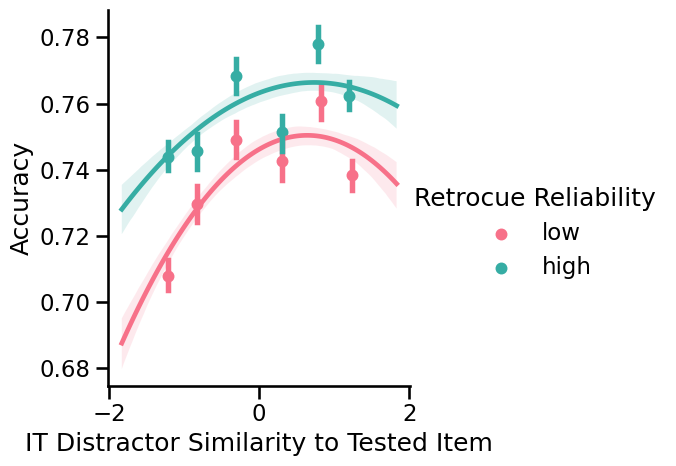

In [456]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Retrocue Reliability',  
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)
plt.show()

<Figure size 1000x600 with 0 Axes>

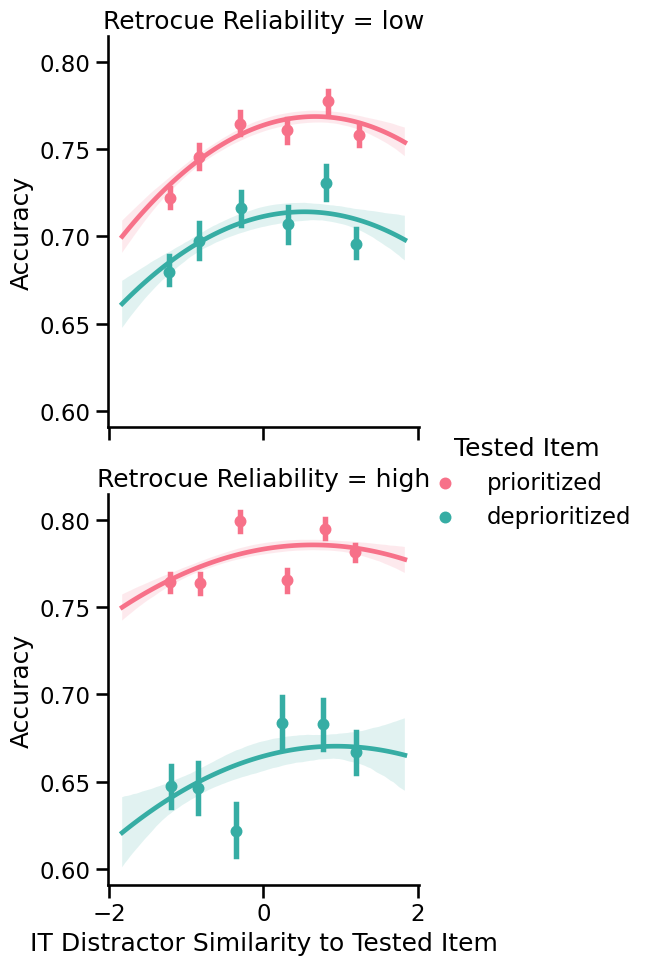

In [457]:


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    row='Retrocue Reliability',  
    row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

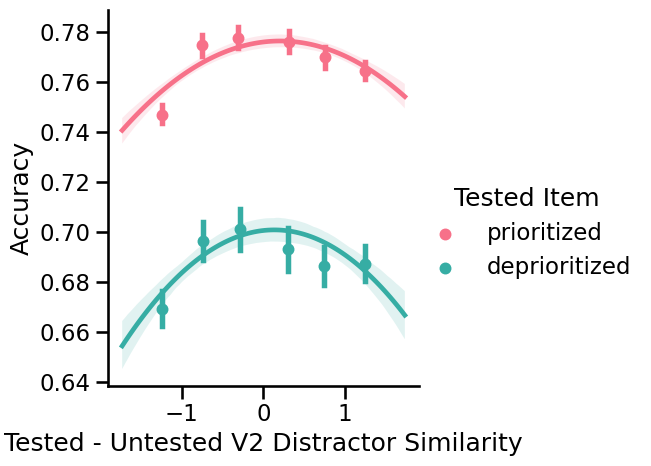

In [458]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

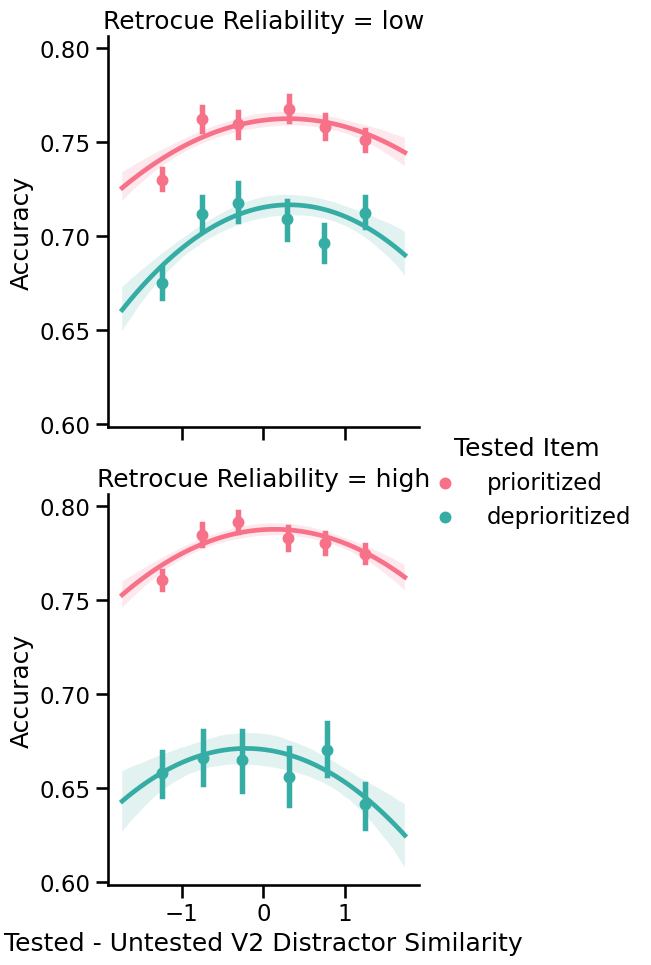

In [459]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Tested Item',

    row = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [460]:
# df_filtered_neg = df[df['Tested - Untested IT Distractor Similarity'] < 0]
# df_filtered_pos = df[df['Tested - Untested IT Distractor Similarity'] >= 0]

<Figure size 1000x600 with 0 Axes>

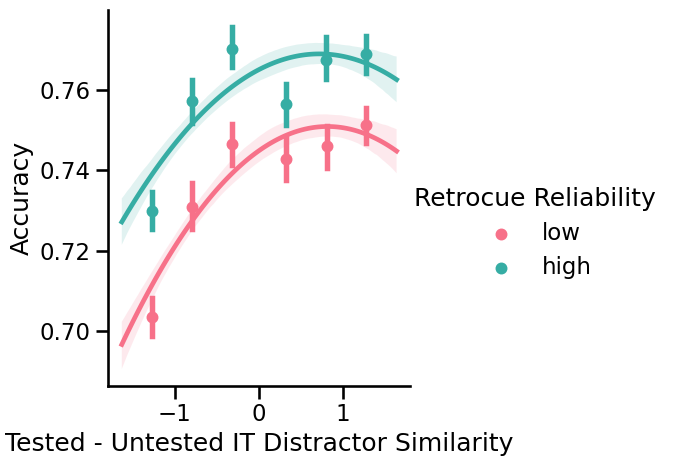

In [461]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    # hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

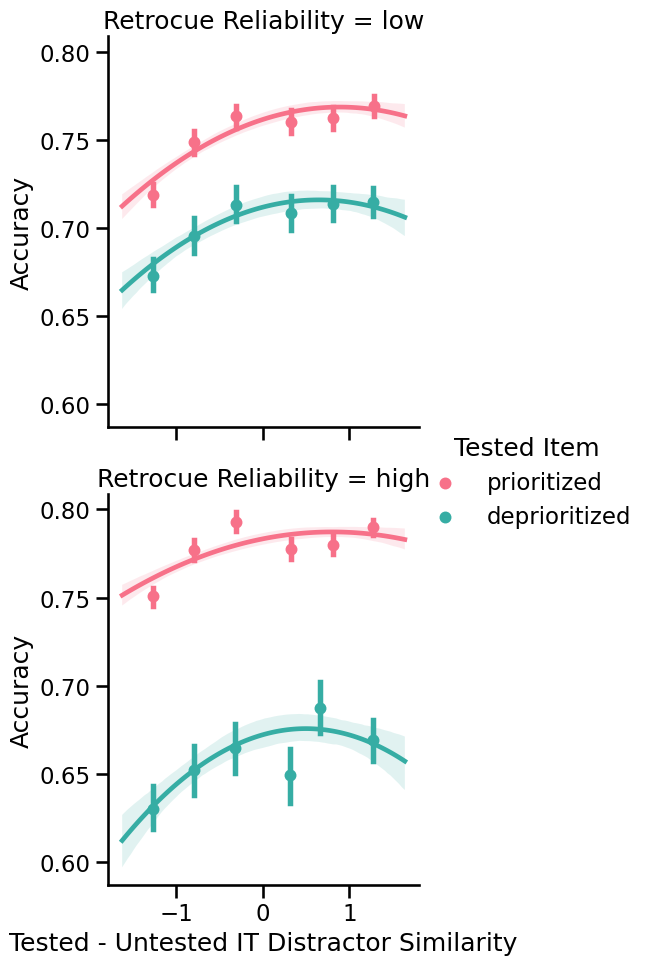

In [462]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


In [463]:
df_correct['Response Time'] = df_correct['analysis_rt']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/1728104853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['Response Time'] = df_correct['analysis_rt']


<Figure size 1000x600 with 0 Axes>

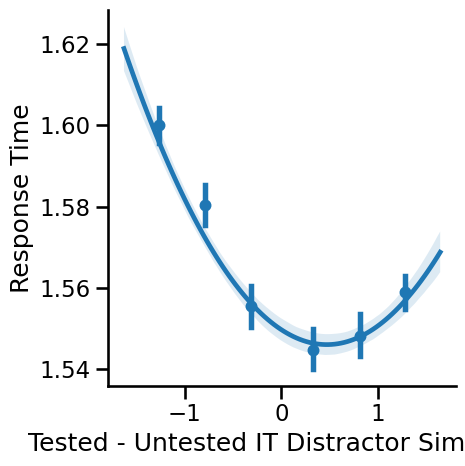

In [464]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Response Time',
#     row = 'Retrocue Reliability',
#     hue = 'Tested Item',
#     row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)


<Figure size 1000x600 with 0 Axes>

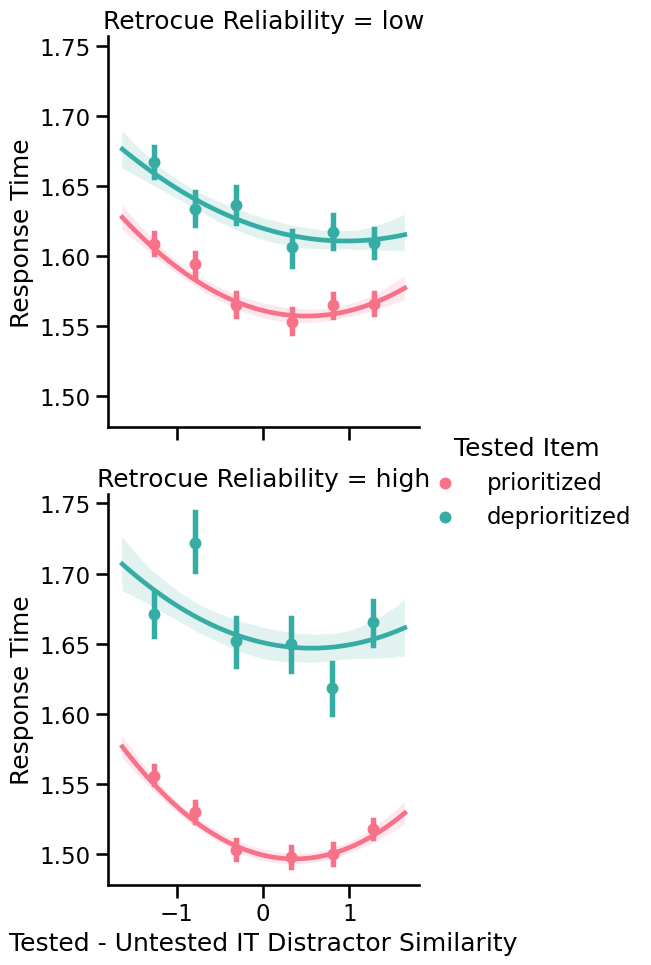

In [465]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Response Time',
    hue = 'Tested Item',
    row = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

<Figure size 1000x600 with 0 Axes>

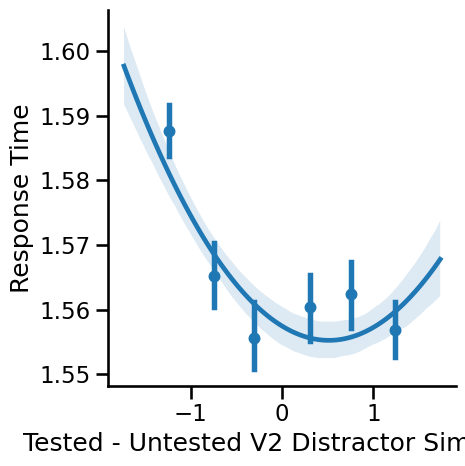

In [466]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    #row = 'Retrocue Reliability',
    # hue = 'Tested Item',
    #row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)


<Figure size 1000x600 with 0 Axes>

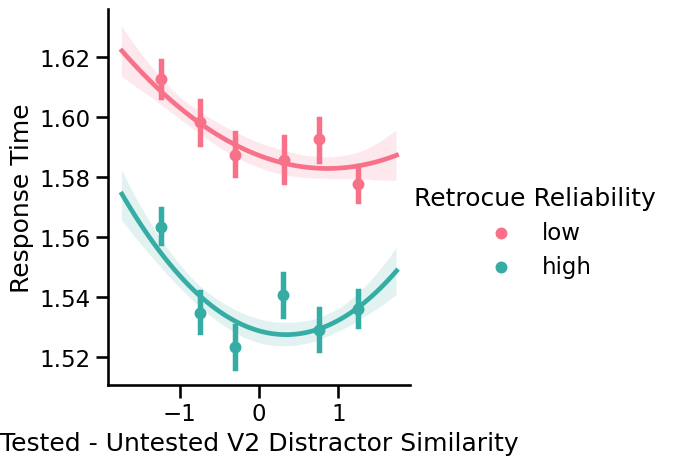

In [467]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

<Figure size 1000x600 with 0 Axes>

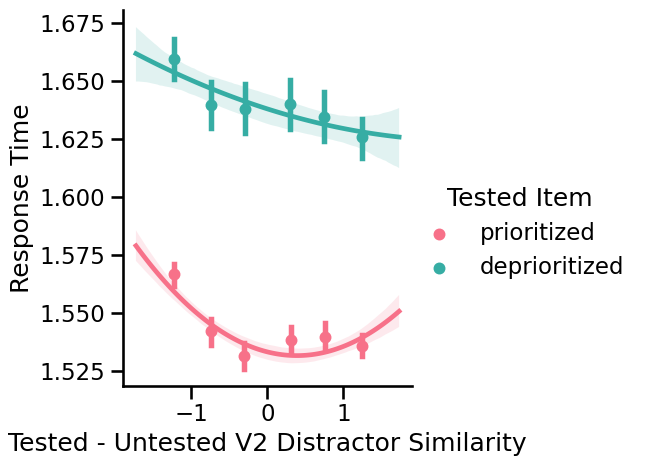

In [468]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

<Figure size 1000x600 with 0 Axes>

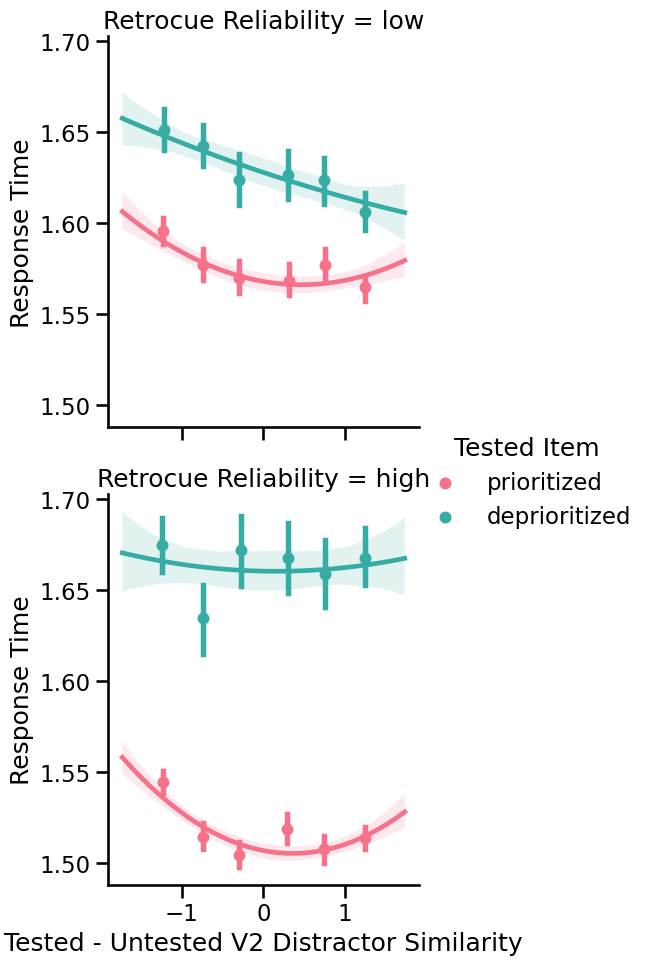

In [469]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)


<Figure size 1000x600 with 0 Axes>

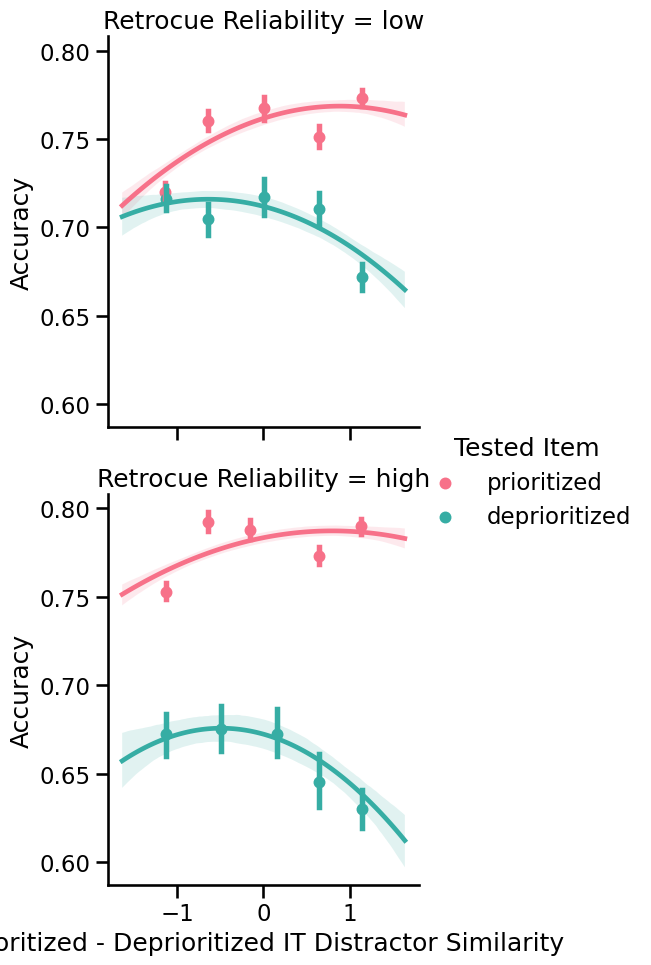

In [470]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Prioritized - Deprioritized IT Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

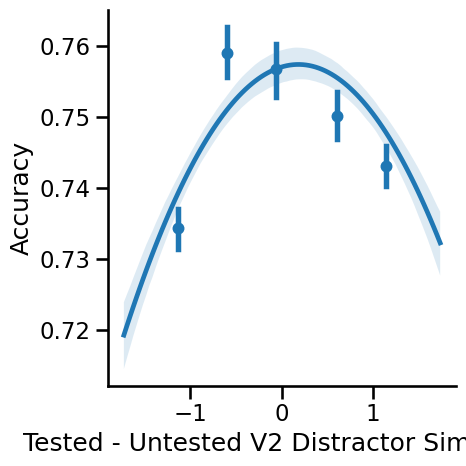

In [471]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

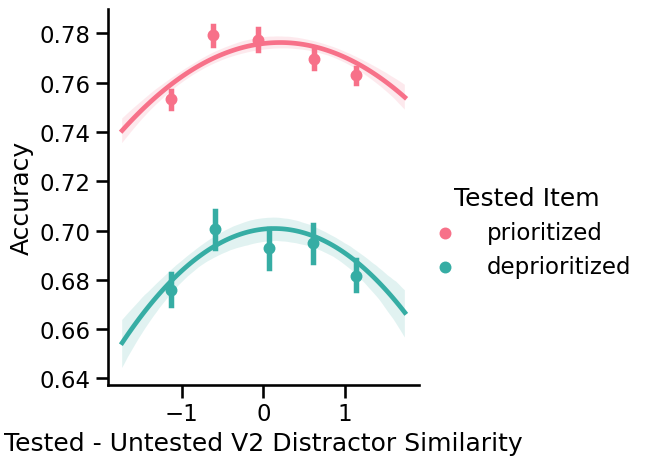

In [472]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

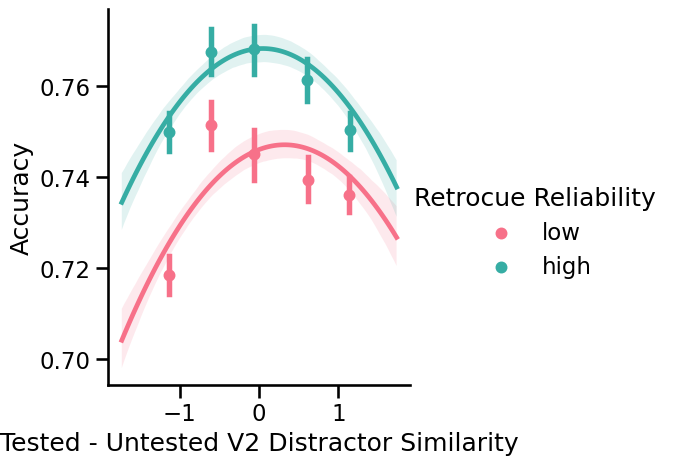

In [473]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

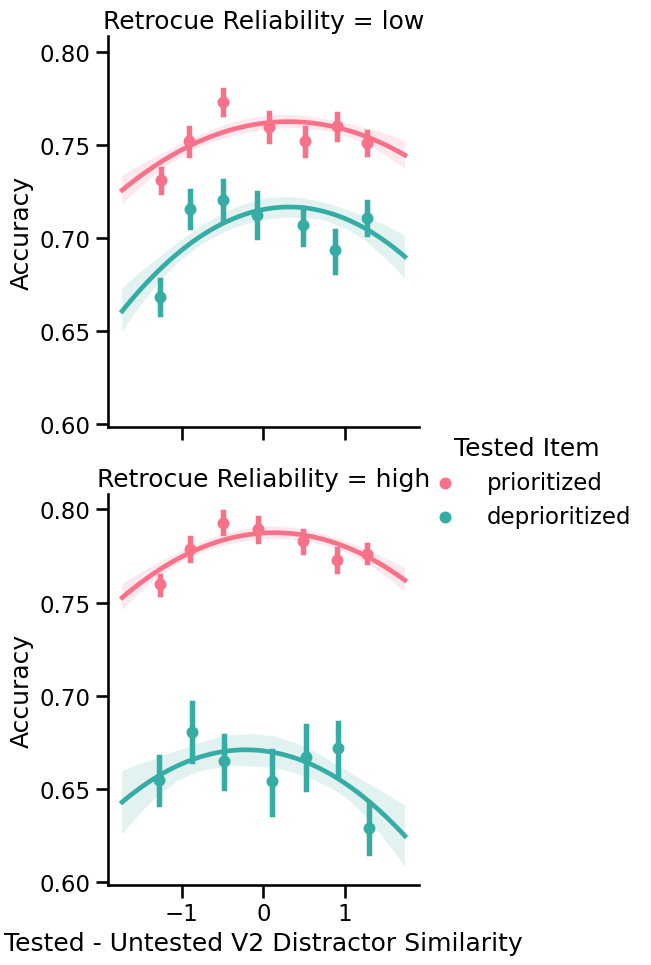

In [474]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 7,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [475]:
df['Tested Item']

0          prioritized
1          prioritized
2        deprioritized
3          prioritized
4        deprioritized
             ...      
82495    deprioritized
82496      prioritized
82497      prioritized
82498      prioritized
82499      prioritized
Name: Tested Item, Length: 82500, dtype: object

<Figure size 1000x600 with 0 Axes>

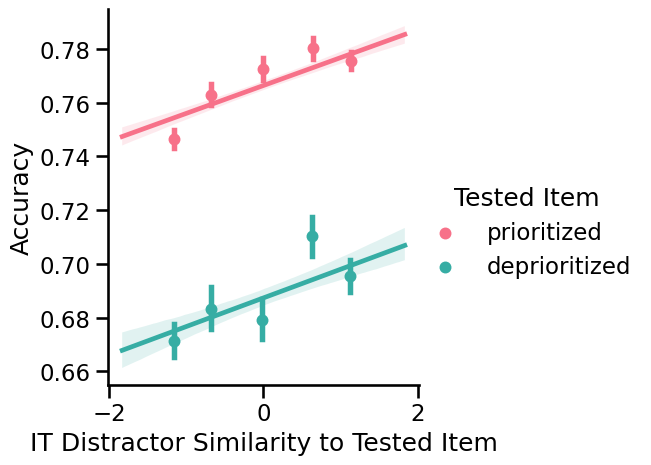

In [476]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
#     row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 5,
    order = 1,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [ ]:
# df['Prioritized - Deprioritized V2 Distractor Similarity Distance Ranges'] = pd.cut(df['it_sim_dis_diff'], bins=5)
# df['Prioritized - Deprioritized IT Distractor Similarity Distance Ranges'] = pd.cut(df['v2_sim_dis_diff'], bins=5)
# df['IT Distractor Similarity to Prioritized Item Distance Ranges'] = pd.cut(df['it_sim_dis_attend'], bins=5)
# df['V2 Distractor Similarity to Prioritized Item Distance Ranges'] =  pd.cut(df['v2_sim_dis_attend'], bins=5)
# df['Tested - Untested V2 Distractor Similarity Distance Ranges'] = pd.cut(df['it_sim_dis_diff_test'], bins=5)
# df['Tested - Untested IT Distractor Similarity Distance Ranges'] = pd.cut(df['v2_sim_dis_diff_test'], bins=5)
# df['IT Distractor Similarity to Tested Item Distance Ranges'] = pd.cut(df['it_sim_dis_test'], bins=5)
# df['V2 Distractor Similarity to Tested Item Distance Ranges'] = pd.cut(df['v2_sim_dis_test'], bins=5)



In [ ]:
# df_it_prior_pos = df[df['it_sim_dis_diff'] >= 0]
# df_it_prior_neg = df[df['it_sim_dis_diff'] < 0]
# df_v2_prior_pos = df[df['v2_sim_dis_diff'] >= 0]
# df_v2_prior_neg = df[df['v2_sim_dis_diff'] < 0]

# df_it_test_pos = df[df['it_sim_dis_diff_test'] >= 0]
# df_it_test_neg = df[df['it_sim_dis_diff_test'] < 0]
# df_v2_test_pos= df[df['v2_sim_dis_diff_test'] >= 0]
# df_v2_test_neg = df[df['v2_sim_dis_diff_test'] < 0]

# df_it_prior_pos['IT_diff_binned_pos'] = pd.qcut(df_it_prior_pos['it_sim_dis_diff'], 5, duplicates='drop')


In [477]:
df['it_pos_neg'] =  np.where(df['it_sim_dis_diff_test_z'] <= 0, 0, 1)
df['v2_pos_neg'] =  np.where(df['v2_sim_dis_diff_test_z'] <= 0, 0, 1)
df['it_pos_neg_abs'] =  np.where(df['it_sim_dis_test_z'] <= 0, 0, 1)
df['v2_pos_neg_abs'] =  np.where(df['v2_sim_dis_test_z'] <= 0, 0, 1)


In [478]:
len(df[df['it_pos_neg_abs'] == 0])

41892

In [479]:
len(df[df['it_pos_neg'] == 1])

40975

Text(0.5, 622.7222222222222, '')

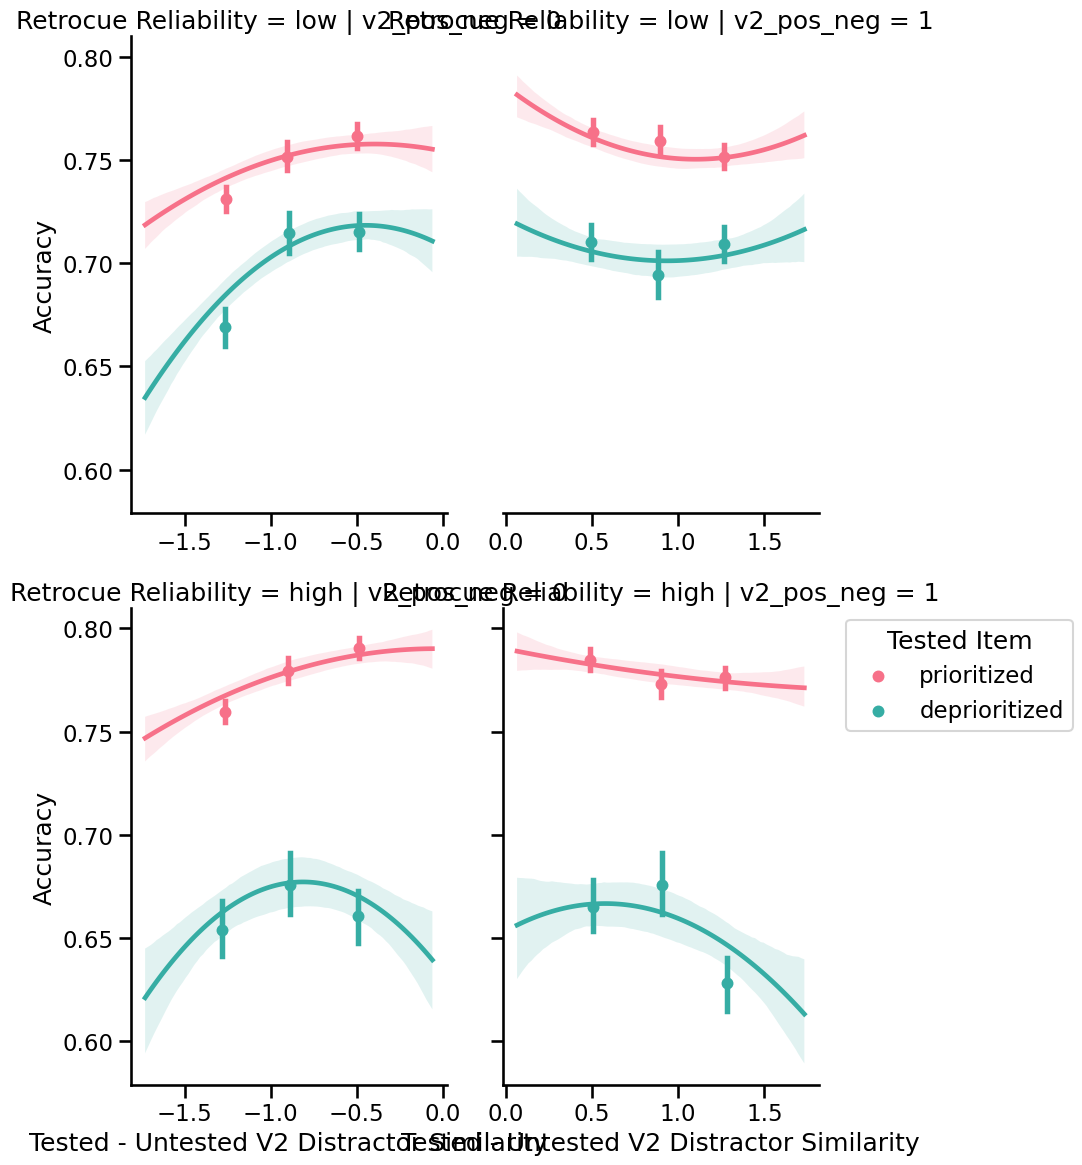

In [480]:
g = sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue='Tested Item',
    col='v2_pos_neg',
    row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df
)

g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

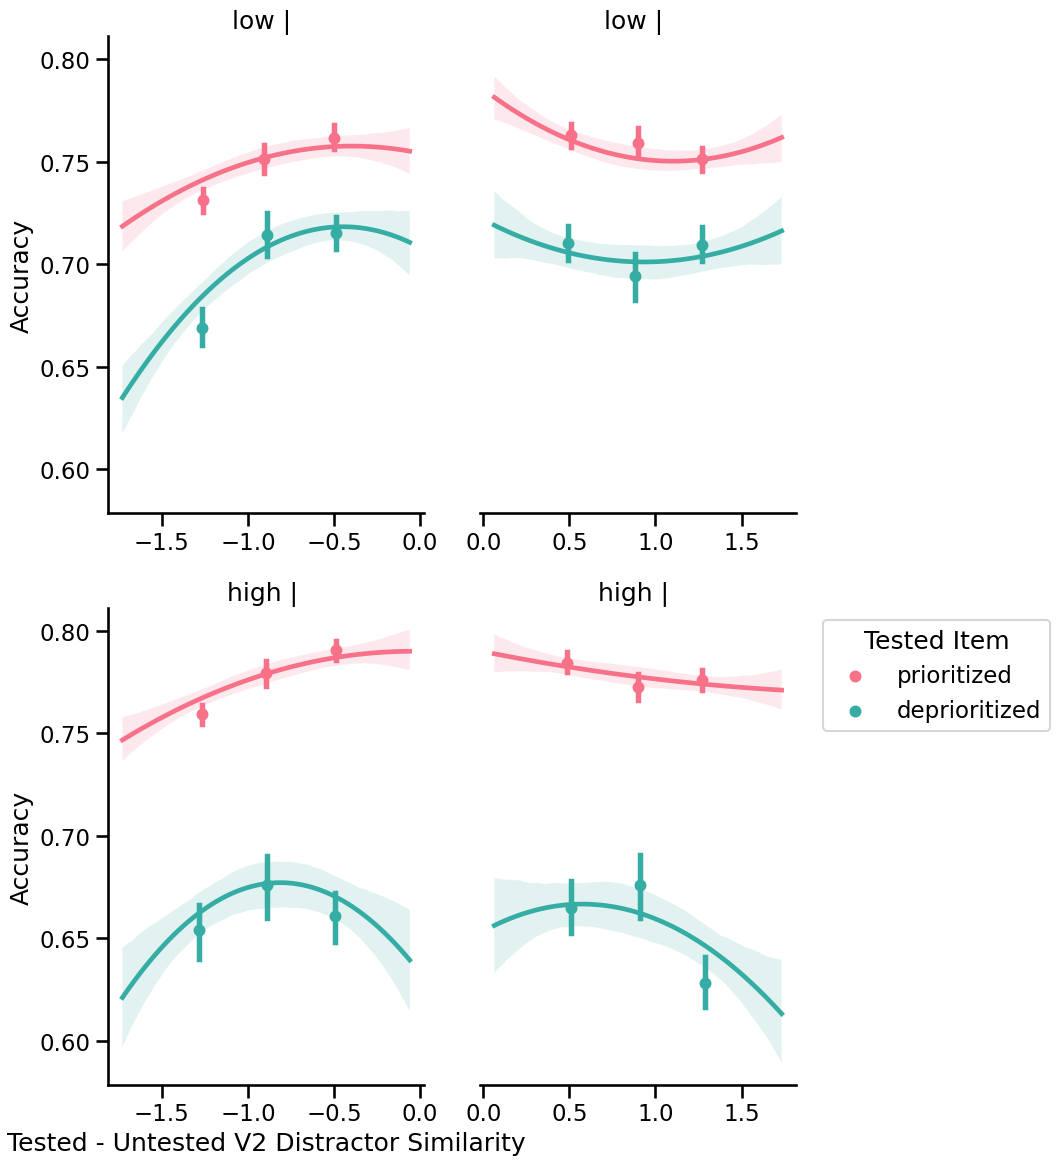

In [481]:
g = sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue='Tested Item',
    col='v2_pos_neg',
    row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df
)

# Remove y-axis and spine from right plots
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
g.axes[0,1].set_xlabel('')
g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')

plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0.5, 622.7222222222222, '')

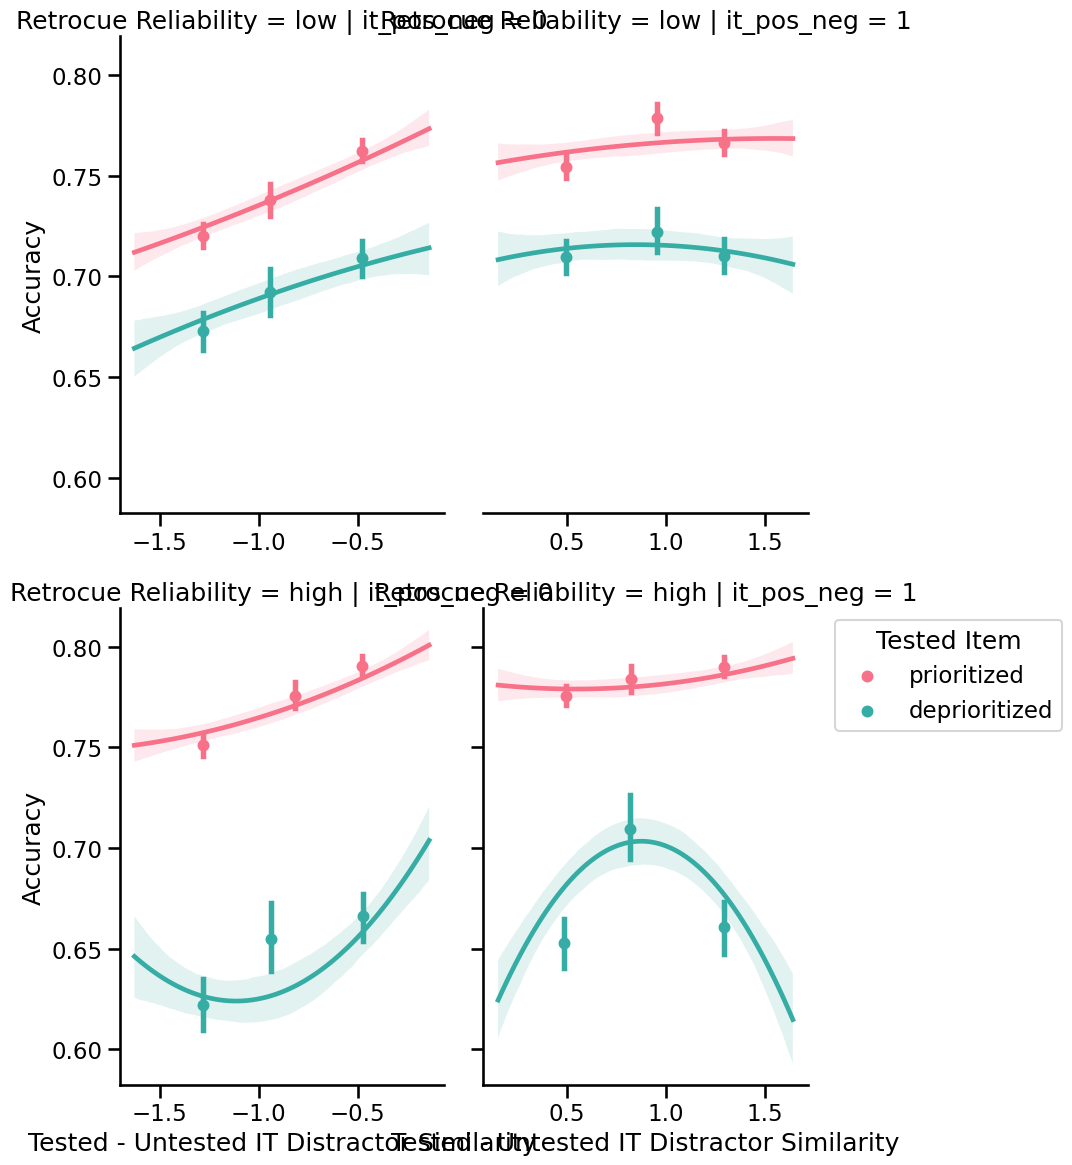

In [482]:
sns.set_context('talk')
g = sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue='Tested Item',
    col='it_pos_neg',
    row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df
)

g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

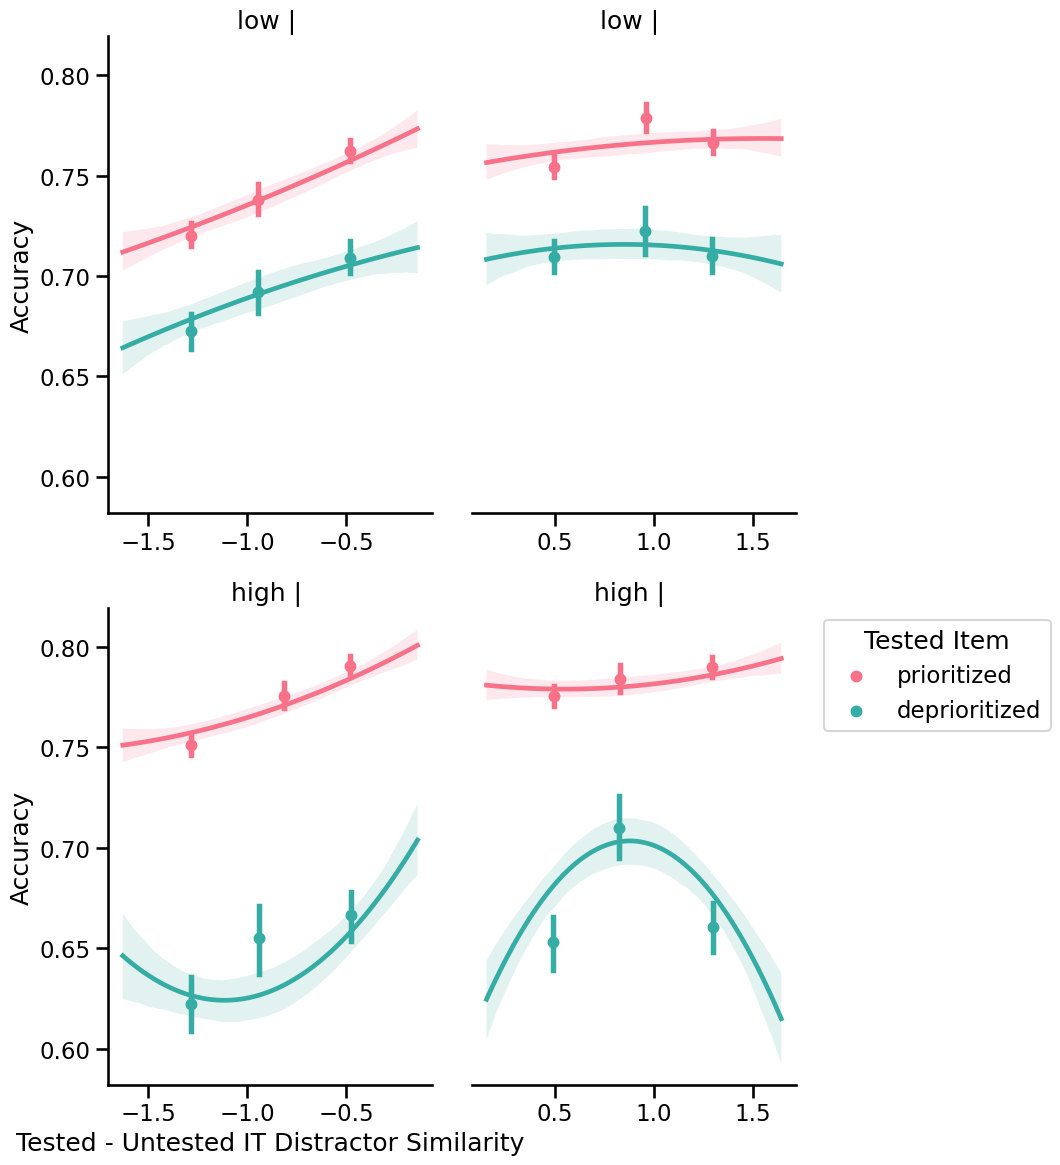

In [483]:
g = sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue='Tested Item',
    col='it_pos_neg',
    row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df
)

# Remove y-axis and spine from right plots
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
g.axes[0,1].set_xlabel('')
g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')

plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')

In [484]:
df_correct = df[df['resp_correct'] == 1]

In [485]:
df_correct = df[df['resp_correct'] == 1]
df_correct['Response Time'] = df_correct['analysis_rt']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/3838276257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['Response Time'] = df_correct['analysis_rt']


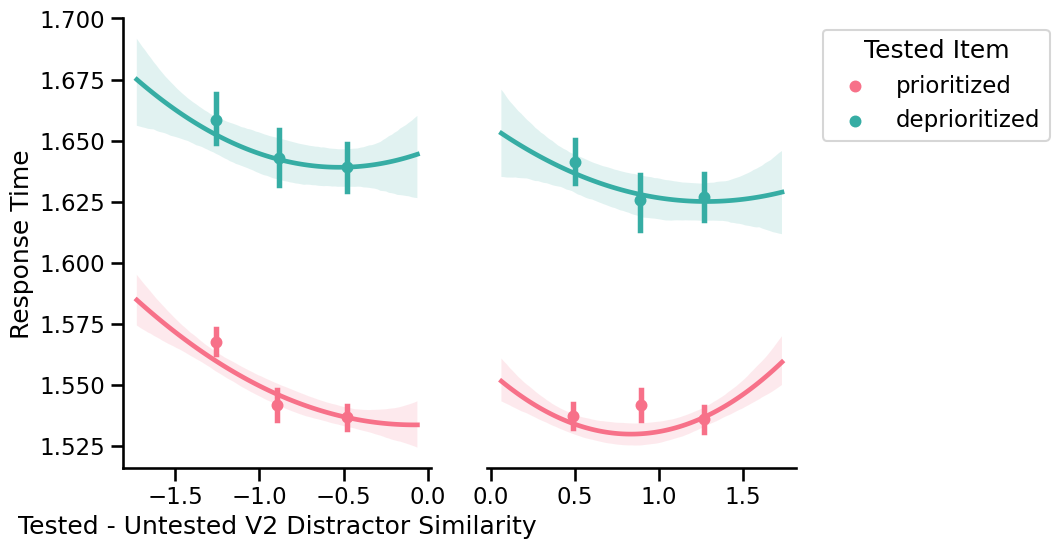

In [486]:
g = sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    hue='Tested Item',
    col='v2_pos_neg',
    # hue='Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_correct
)

# Remove y-axis and spine from right plots
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
# g.axes[1,1].yaxis.set_visible(False)
# g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
g.axes[0,1].set_xlabel('')
# g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')



plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


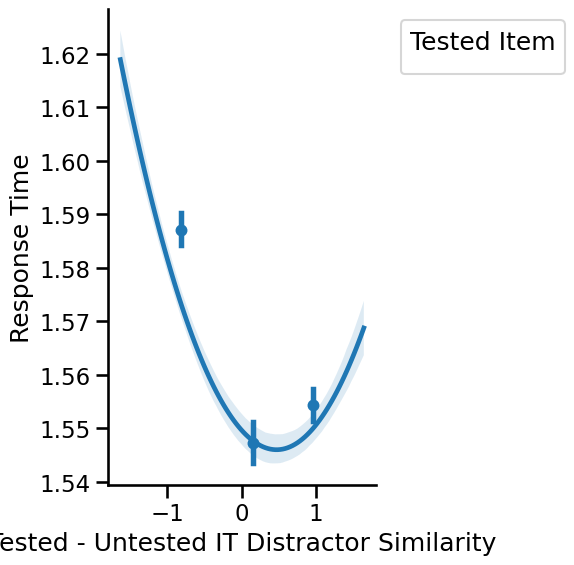

In [487]:
g = sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Response Time',
    # hue='Tested Item',
    # col='v2_pos_neg',
    # row='Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_correct
)

# Remove y-axis and spine from right plots
# g.axes[0,1].yaxis.set_visible(False)
# g.axes[0,1].spines['left'].set_visible(False)
# g.axes[1,1].yaxis.set_visible(False)
# g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
# g.axes[0,1].set_xlabel('')
# g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')



plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')

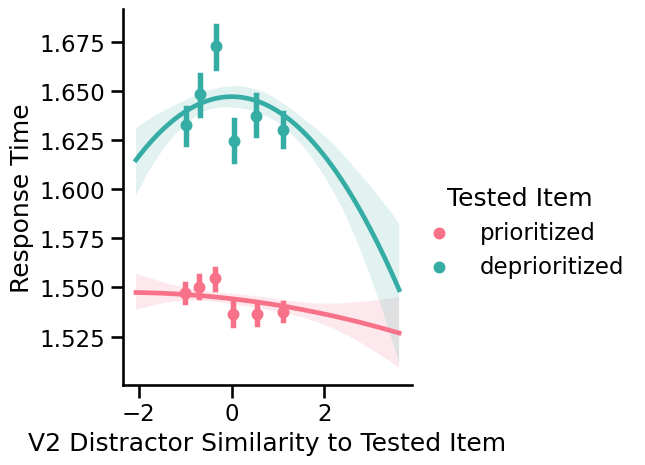

In [488]:
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Response Time',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

Text(0.5, 622.7222222222222, '')

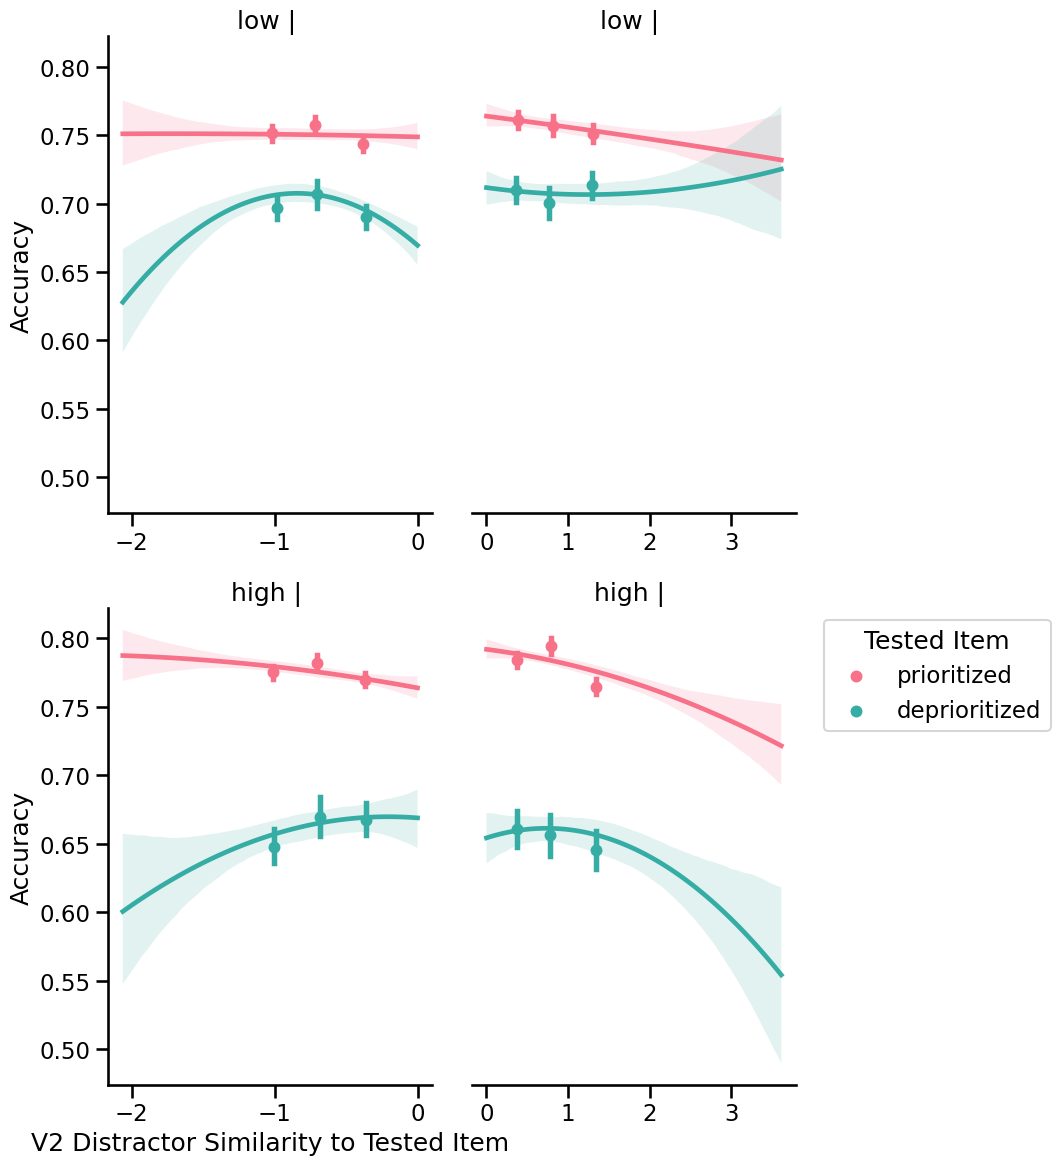

In [489]:
g = sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    col='v2_pos_neg_abs',
    row='Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df
)
# Remove y-axis and spine from right plots
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
g.axes[0,1].set_xlabel('')
g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')



plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

Text(0.5, 622.7222222222222, '')

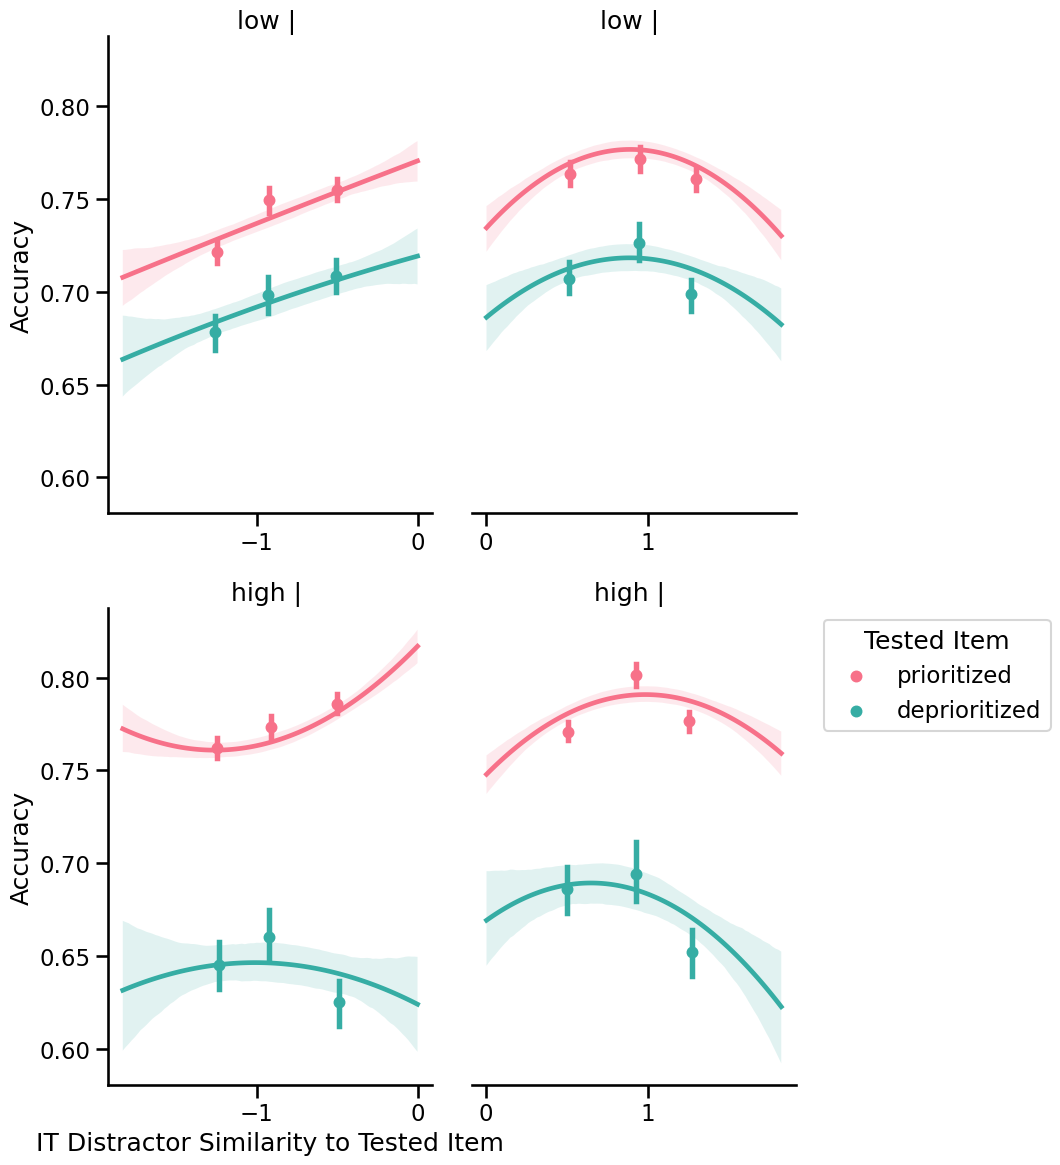

In [490]:
g = sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    col='it_pos_neg_abs',
    row='Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df
)
# Remove y-axis and spine from right plots
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
g.axes[0,1].set_xlabel('')
g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')



plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [491]:
df_correct = df[df['resp_correct'] == 1]
df_correct['Response Time'] = df_correct['analysis_rt']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/3838276257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['Response Time'] = df_correct['analysis_rt']


Text(0.5, 622.7222222222222, '')

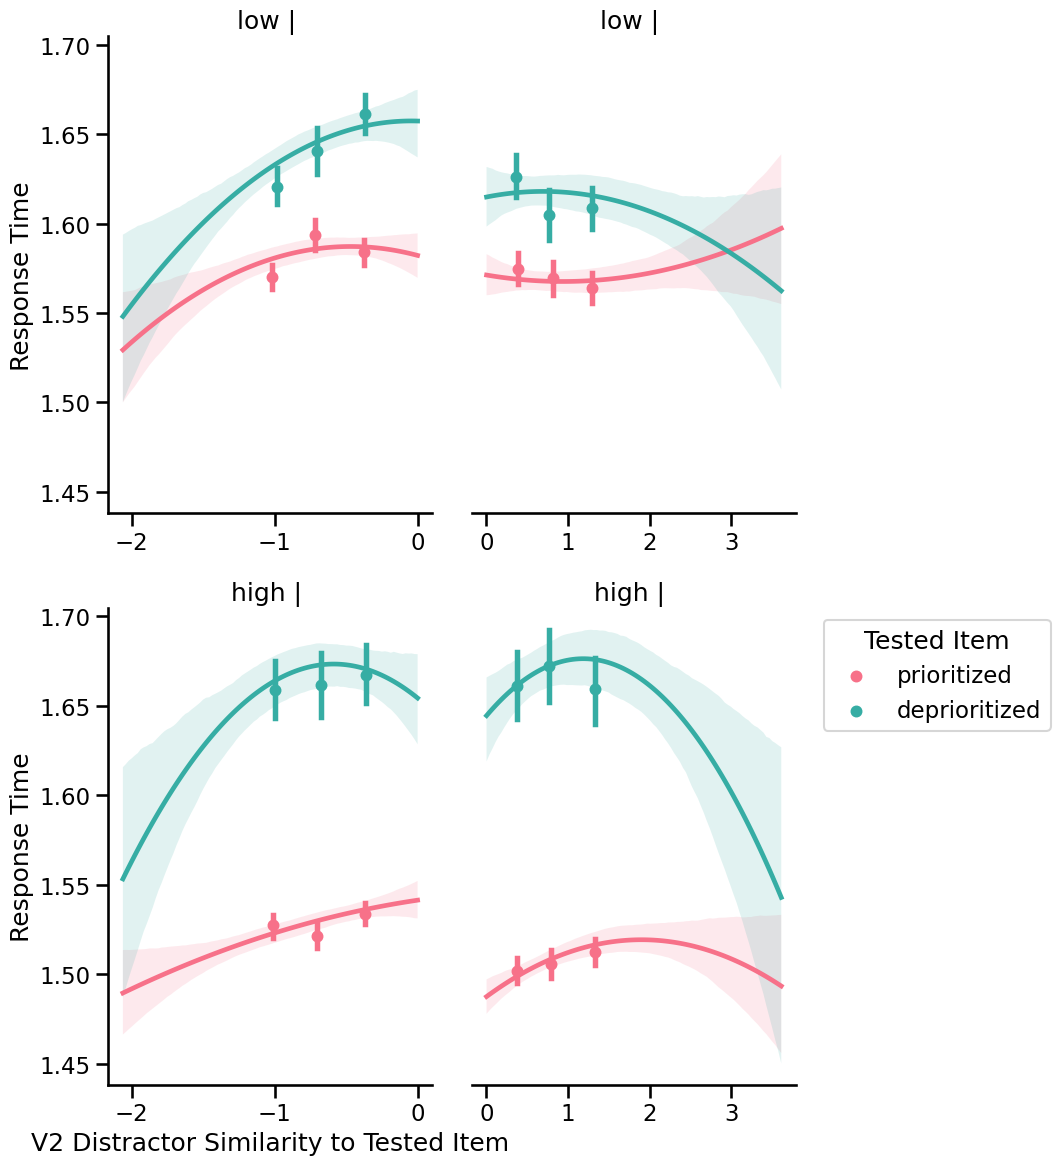

In [492]:
g = sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Response Time',
    hue='Tested Item',
    col='v2_pos_neg_abs',
    row='Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_correct
)
# Remove y-axis and spine from right plots
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
g.axes[0,1].set_xlabel('')
g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')



plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')



Text(0.5, 622.7222222222222, '')

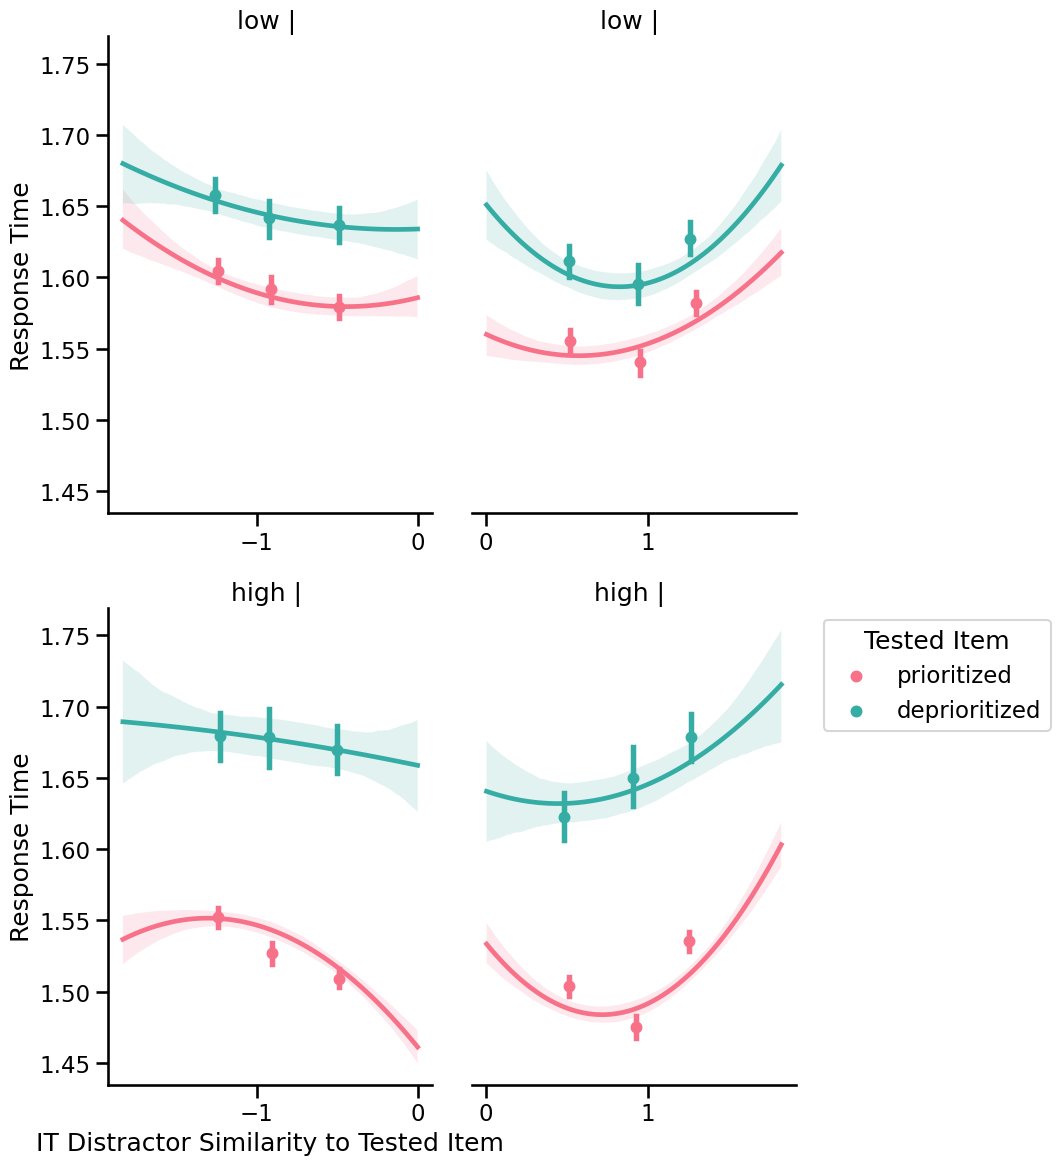

In [493]:
g = sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Response Time',
    hue='Tested Item',
    col='it_pos_neg_abs',
    row='Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_correct
)
# Remove y-axis and spine from right plots
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

# Remove x-labels from right plots
g.axes[0,1].set_xlabel('')
g.axes[1,1].set_xlabel('')

# Remove column titles while keeping row titles
g.set_titles(col_template='', row_template='{row_name}')



plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')



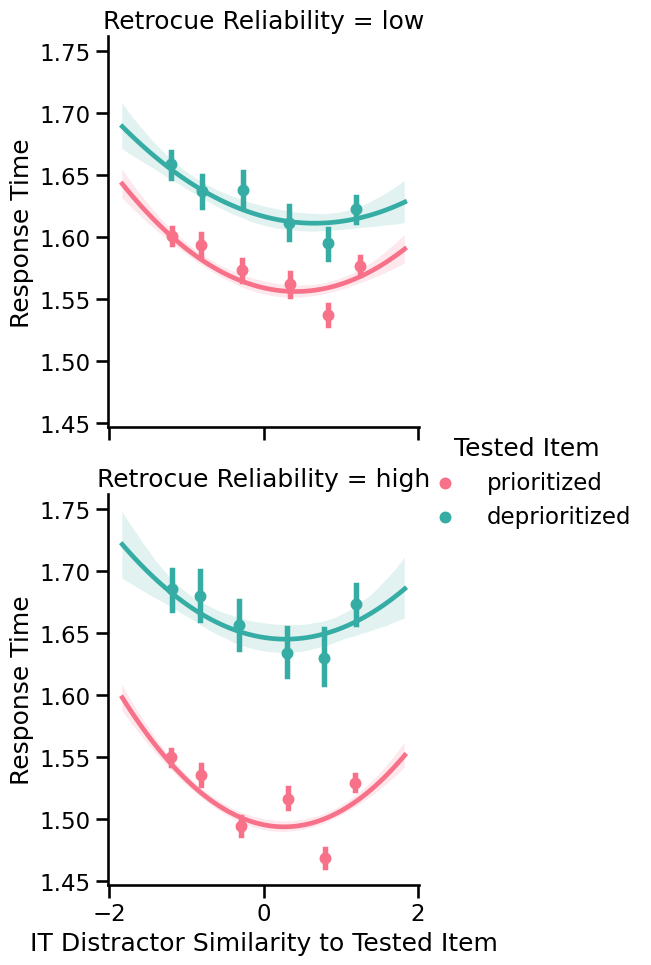

In [494]:
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Response Time',
    hue = 'Tested Item',
    row = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

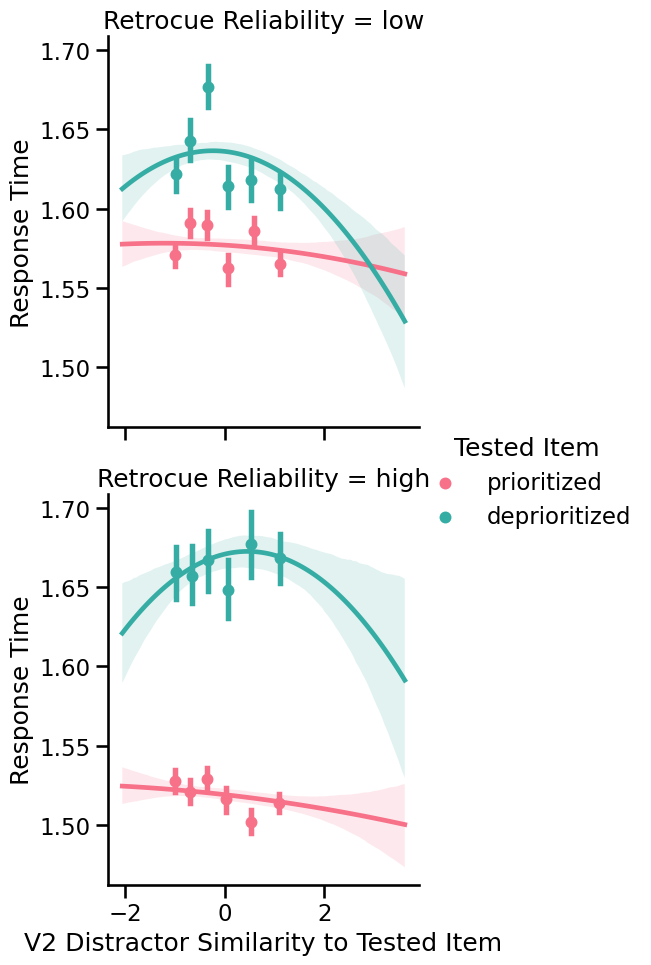

In [495]:
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Response Time',
    hue = 'Tested Item',
    row = 'Retrocue Reliability',

    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

In [496]:
df['tested_memorability_resmem_z'] = scaler.fit_transform(df[['tested_memorability_resmem']])

In [497]:
# df.to_csv('pilot_TOTAL_TEST.csv', index=False)  # Set index=False to avoid saving row indices


In [498]:
scaler = StandardScaler()

df['it_pos_neg_abs_z'] =  scaler.fit_transform(df[['it_pos_neg_abs']])
df['v2_pos_neg_abs_z'] = scaler.fit_transform(df[['v2_pos_neg_abs']])
df['it_pos_neg_z'] = scaler.fit_transform(df[['it_pos_neg']])
df['v2_pos_neg_z'] = scaler.fit_transform(df[['v2_pos_neg']])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/2383427685.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.catplot(


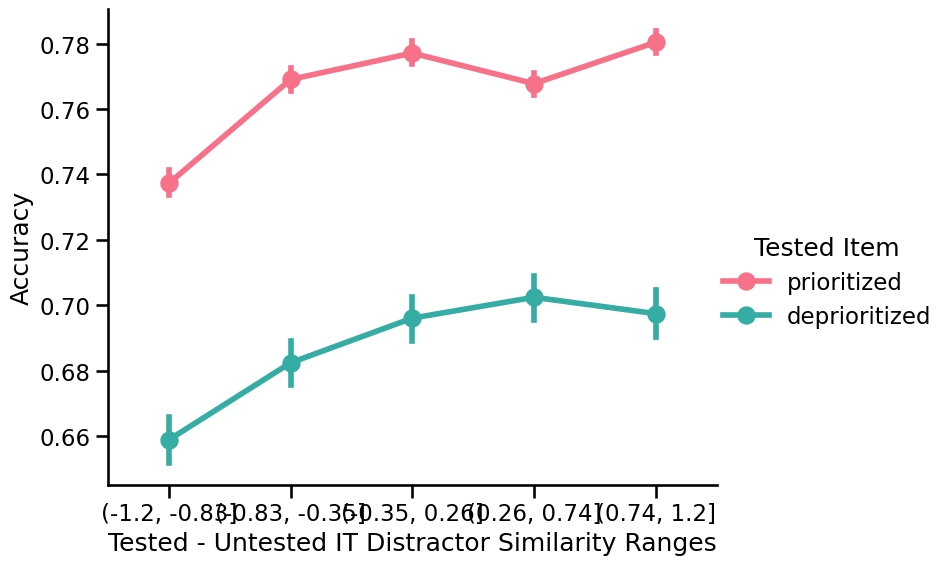

In [499]:

df['pilot_type'] = np.where(df['pilot_number'] == 1, 'new stimuli', 'old stimuli')

sns.catplot(
    data=df,
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='Accuracy',
    hue='Tested Item',
#         col = 'pilot_type',

#     col='Retrocue Reliability',
#     col_order = ['low', 'high'],
    kind='point',
    ci=68,
    palette=palette[::-1],
    height=6,
    aspect=1.3
)

In [500]:
### instead of Prioritized-Deprioritized similarity on x axis, get (both relative and absolute)
# Similarity to Tested item and then split by prioritzed - x axis will be relative to tested/untested instead of prioritized/deprioritized

In [501]:
df['tested_memorability_resmem']

0        0.821004
1        0.890449
2        0.972881
3        0.846955
4        0.817970
           ...   
82495    0.819682
82496    0.901505
82497    0.790799
82498    0.937952
82499    0.936727
Name: tested_memorability_resmem, Length: 82500, dtype: float64

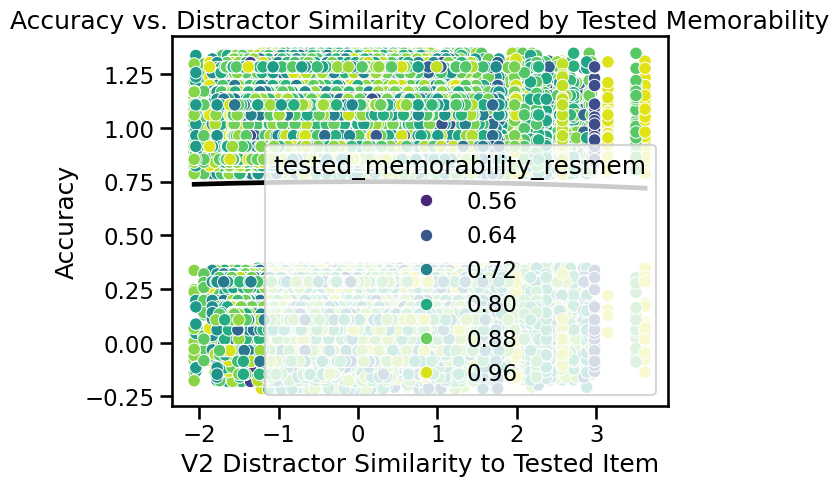

In [502]:
sns.scatterplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_resmem',        # Numeric
    palette='viridis',               # Continuous colormap
    data=df
)

sns.regplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    order=2,
    ci=68,
    scatter=False,                   # Don't re-draw points
    color='black',
    data=df
)

plt.title("Accuracy vs. Distractor Similarity Colored by Tested Memorability")
plt.show()

In [503]:
df['tested_memorability_binned'] = pd.qcut(df['tested_memorability_resmem'], q=3, 
                                           labels=['Low','Medium', 'High'])


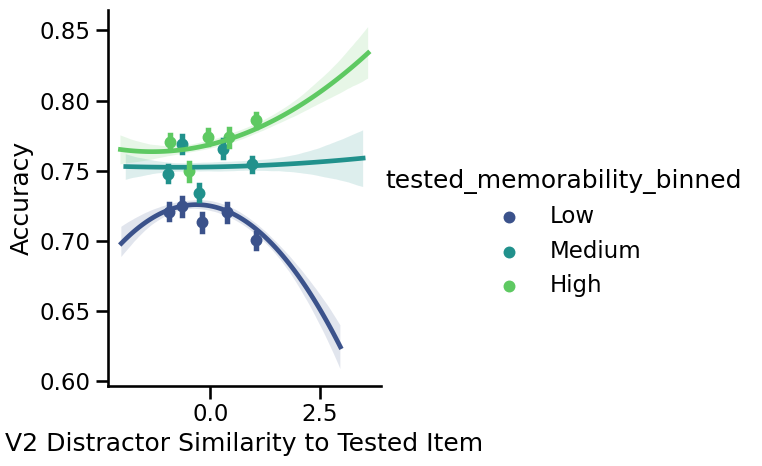

In [504]:
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

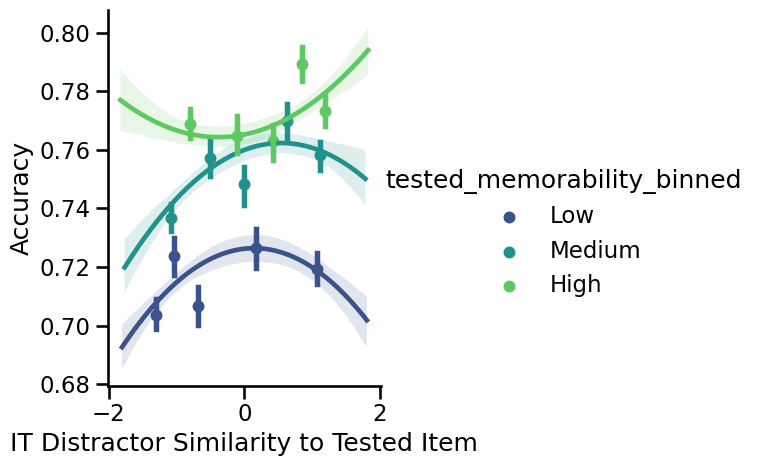

In [505]:
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

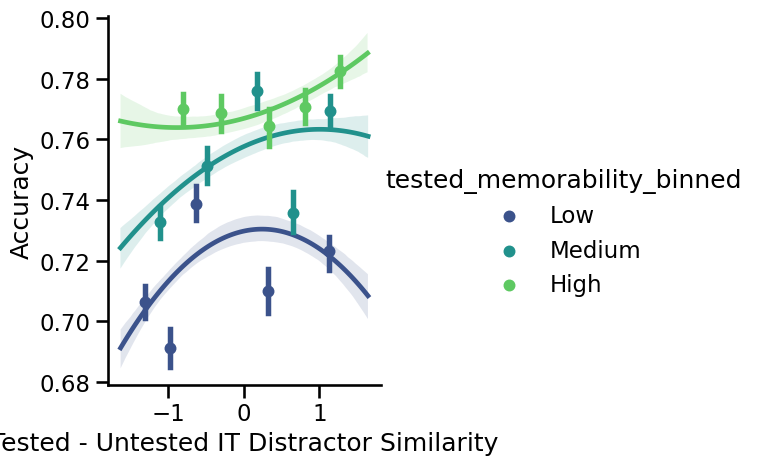

In [506]:
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

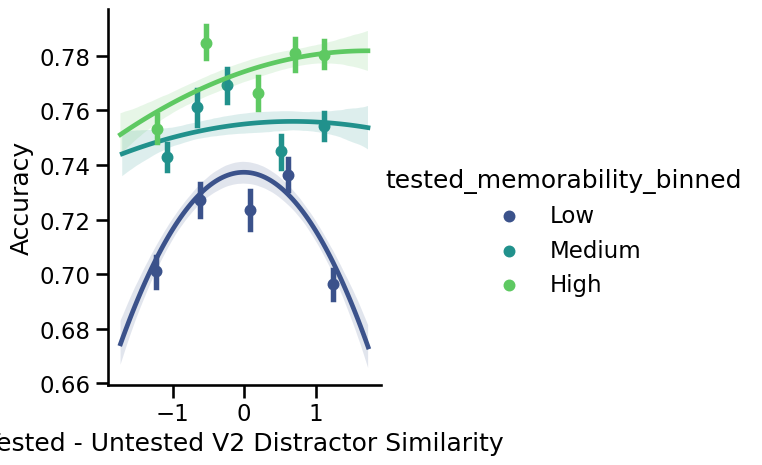

In [507]:
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/3387455507.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


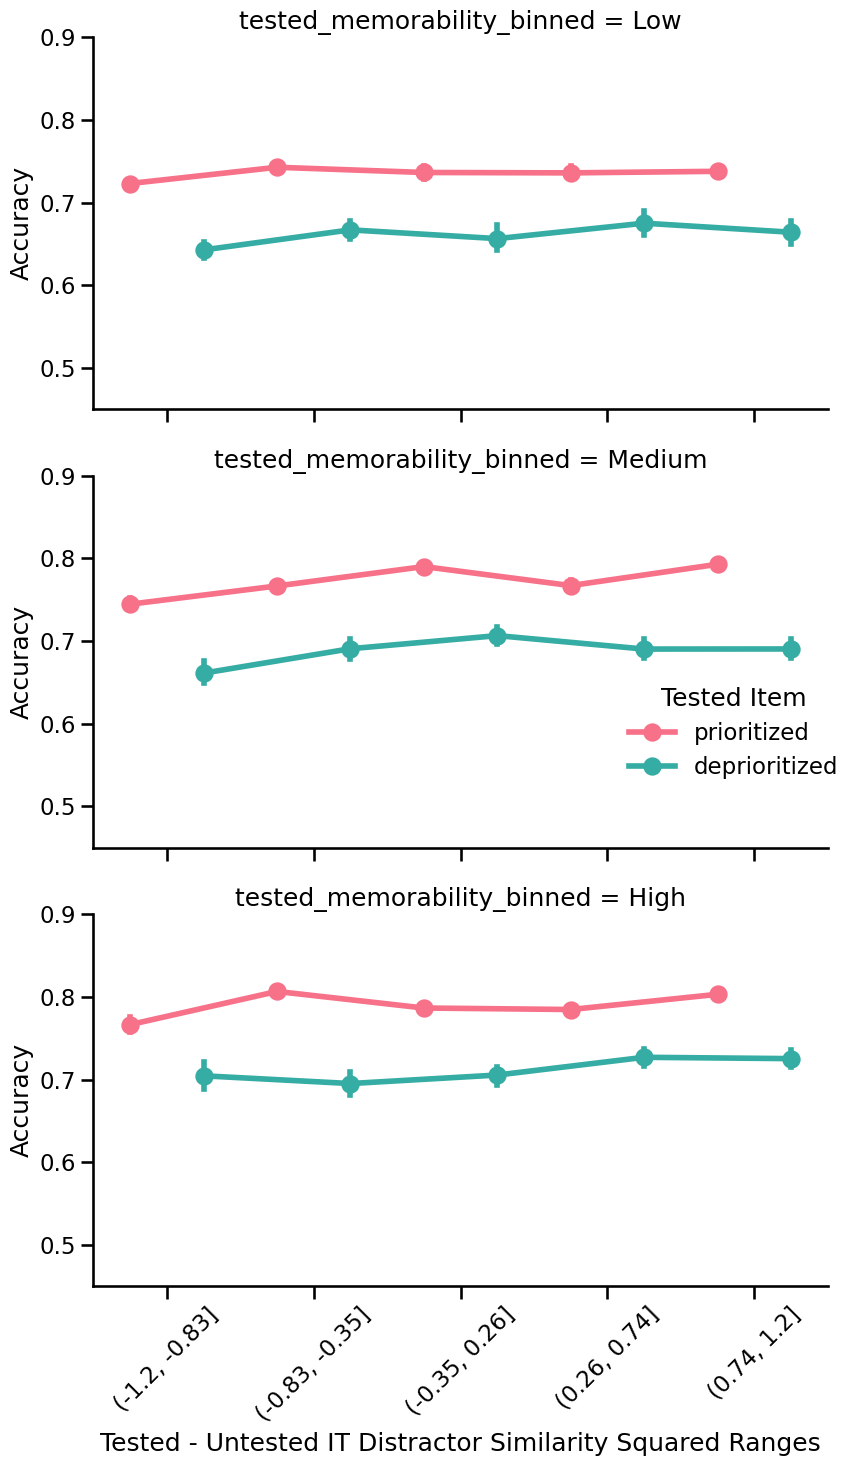

In [508]:

g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='tested_memorability_binned',  # Use 'row' instead of 'col'
    aspect=1.3,
#     row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.45, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested IT Distractor Similarity Squared Ranges", "Accuracy")
plt.tight_layout()
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/4190826694.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


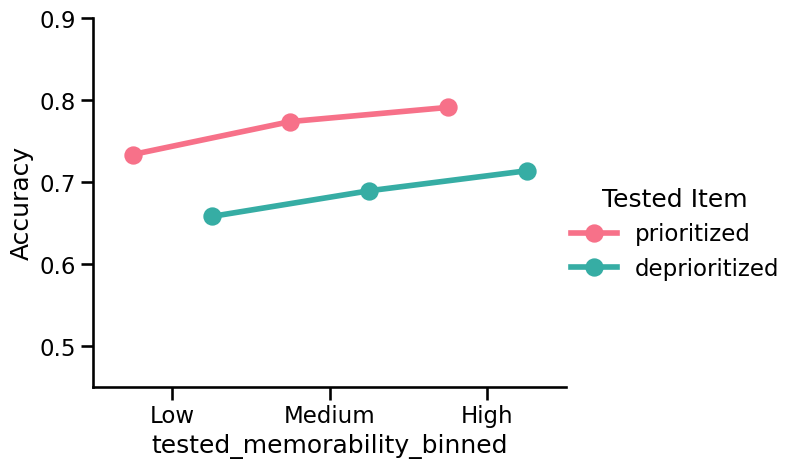

In [509]:
g = sns.catplot(
    x='tested_memorability_binned',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
#     row='Retrocue Reliability',
    aspect=1.3,
#     row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.45, 0.9))


In [510]:
df['Tested Item Memorability'] = df['tested_memorability_binned']

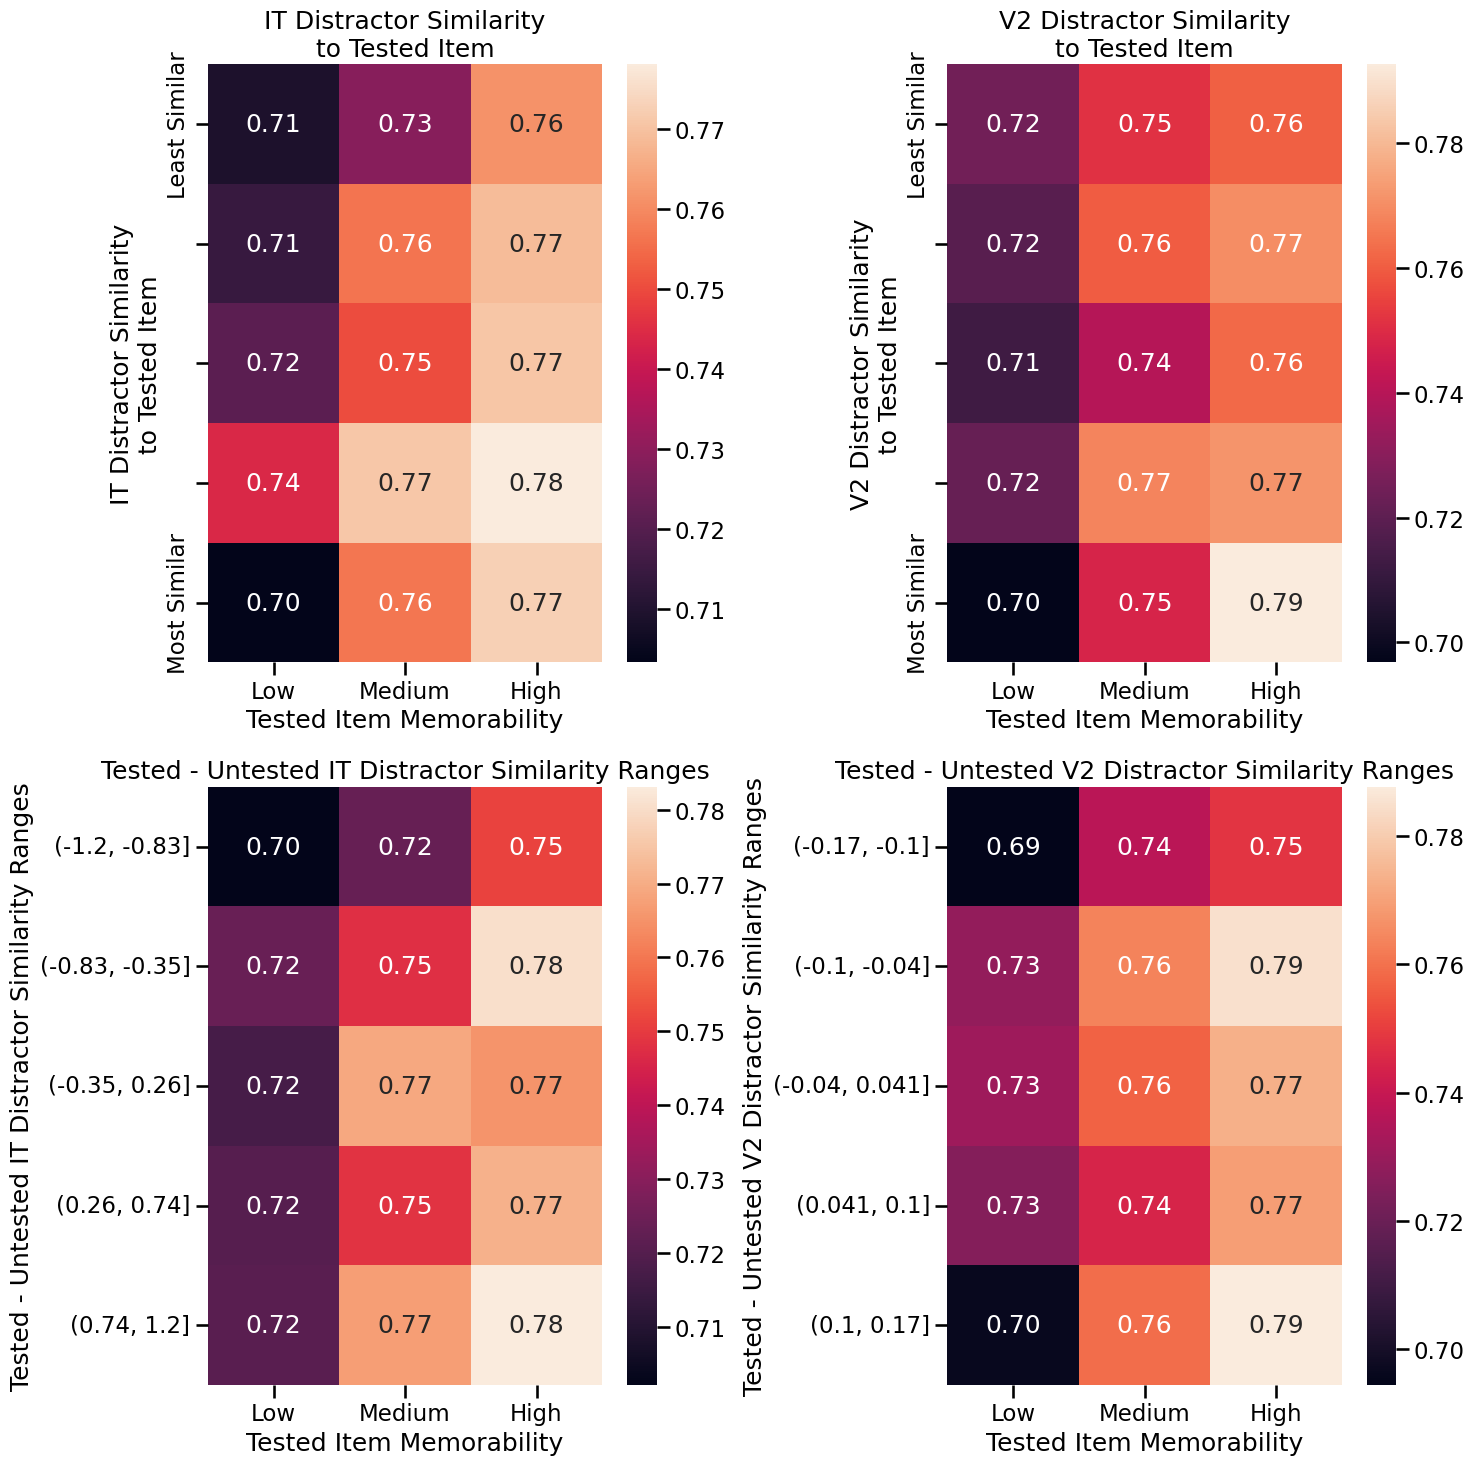

In [511]:
# Create a figure with 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# List of similarity metrics
similarity_metrics = [
    'IT Distractor Similarity\nto Tested Item',
    'V2 Distractor Similarity\nto Tested Item',
    'Tested - Untested IT Distractor Similarity Ranges',
    'Tested - Untested V2 Distractor Similarity Ranges'
]

# Create heatmaps
axes = [ax1, ax2, ax3, ax4]
for ax, metric in zip(axes, similarity_metrics):
    # Create pivot table
    heatmap_data = df.pivot_table(
        values='Accuracy',
        index=metric,
        columns='Tested Item Memorability',
        aggfunc='mean'
    )
    
    # Create heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='.2f',
        #cmap='RdYlBu_r',
        ax=ax
    )
    
    # Set title
    ax.set_title(metric)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/3617249075.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/3617249075.py:15: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/3617249075.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950/3617249075.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_15950

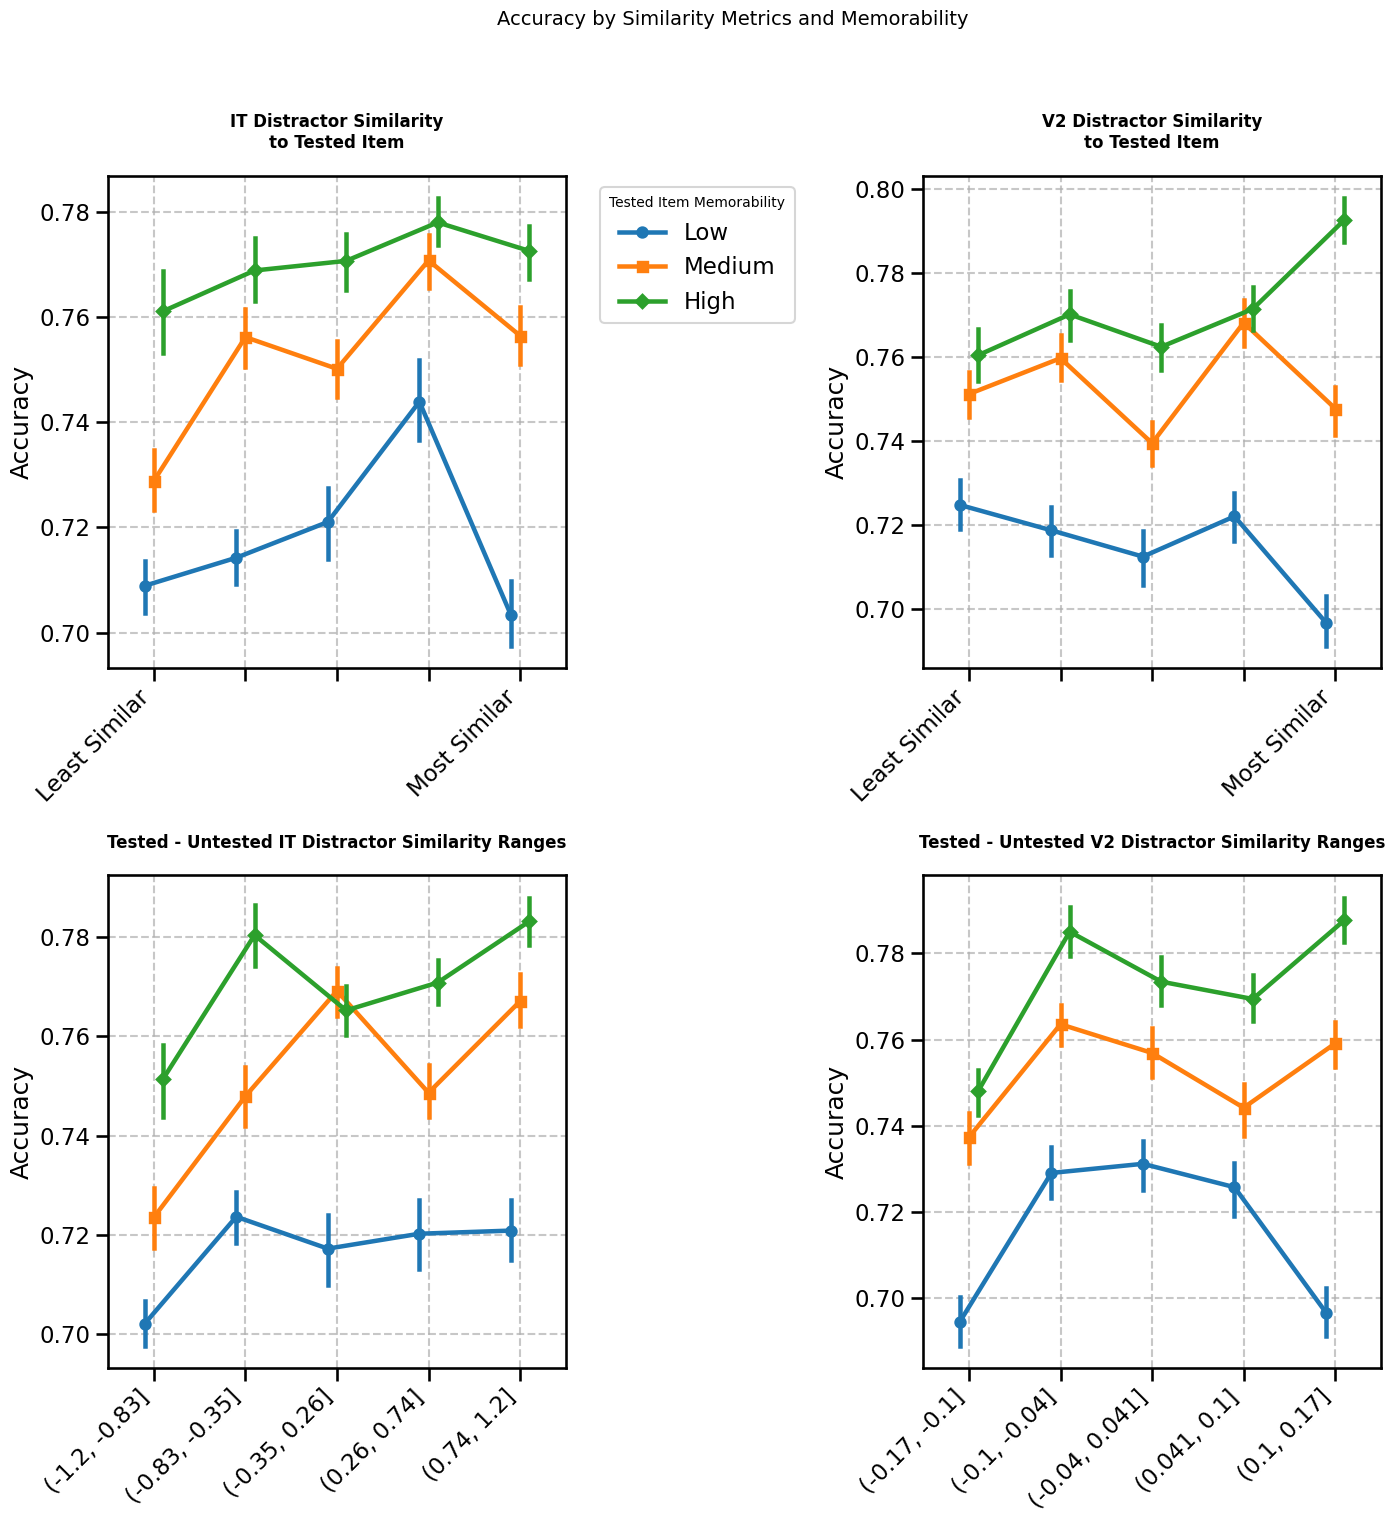

In [512]:
# Set figure size and create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# List of similarity metrics
similarity_metrics = [
    'IT Distractor Similarity\nto Tested Item',
    'V2 Distractor Similarity\nto Tested Item',
    'Tested - Untested IT Distractor Similarity Ranges',
    'Tested - Untested V2 Distractor Similarity Ranges'
]

# Create point plots
axes = [ax1, ax2, ax3, ax4]
for ax, metric in zip(axes, similarity_metrics):
    sns.pointplot(
        x=metric,
        y='Accuracy',
        hue='Tested Item Memorability',
        data=df,
        dodge=0.2,
        ci=68,
        ax=ax,
        markers=['o', 's', 'D', '^', 'v'],  # Different markers for each category
        scale=0.8,  # Adjust point size
        #legend=False if ax != ax1 else True
    )
    
    # Customize each subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(metric, pad=20, fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('')  # Remove x-label as it's in the title
    
    # Remove legend if not the first plot
    if ax != ax1:
        ax.get_legend().remove()

# Move legend outside for first subplot
legend = ax1.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='Tested Item Memorability',
    title_fontsize=10,
    frameon=True
)

# Add main title
fig.suptitle('Accuracy by Similarity Metrics and Memorability', fontsize=14, y=1.02)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Make room for legend
plt.show()

<Axes: xlabel='Tested Item Memorability', ylabel='Accuracy'>

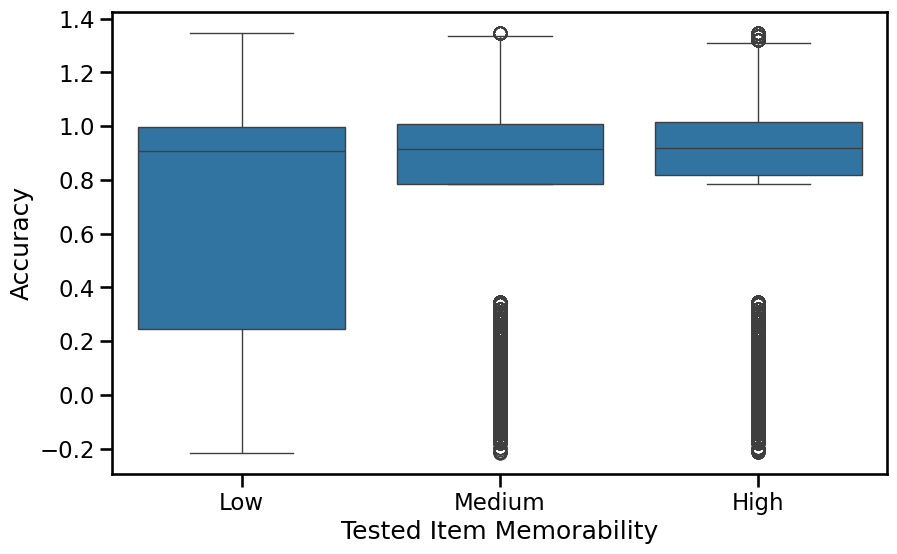

In [513]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Tested Item Memorability',
    y='Accuracy',
    data=df
)

In [514]:
# df['Tested Item Memorability - Distance split'] = pd.cut(df['tested_memorability_resmem'], bins=5)


In [515]:
# counts = df['Tested Item Memorability - Distance split'].value_counts()
# plt.figure(figsize=(10, 10))
# plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
# plt.title('Distribution of Items Across Memorability Bins')

In [516]:
# # Create a figure with 2x2 subplots
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# # List of similarity metrics
# similarity_metrics = [
#     'IT Distractor Similarity\nto Tested Item',
#     'V2 Distractor Similarity\nto Tested Item',
#     'Tested - Untested IT Distractor Similarity Ranges',
#     'Tested - Untested V2 Distractor Similarity Ranges'
# ]

# # Create heatmaps
# axes = [ax1, ax2, ax3, ax4]
# for ax, metric in zip(axes, similarity_metrics):
#     # Create pivot table
#     heatmap_data = df.pivot_table(
#         values='Accuracy',
#         index=metric,
#         columns='Tested Item Memorability - Distance split',
#         aggfunc='mean'
#     )
    
#     # Create heatmap
#     sns.heatmap(
#         heatmap_data,
#         annot=True,
#         fmt='.2f',
#         #cmap='RdYlBu_r',
#         ax=ax
#     )
    
#     # Set title
#     ax.set_title(metric)

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [517]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# # List of similarity metrics
# similarity_metrics = [
#     'IT Distractor Similarity\nto Tested Item',
#     'V2 Distractor Similarity\nto Tested Item',
#     'Tested - Untested IT Distractor Similarity Ranges',
#     'Tested - Untested V2 Distractor Similarity Ranges'
# ]

# # Create point plots
# axes = [ax1, ax2, ax3, ax4]
# for ax, metric in zip(axes, similarity_metrics):
#     sns.pointplot(
#         x=metric,
#         y='Accuracy',
#         hue='Tested Item Memorability - Distance split',

#         data=df,
#         dodge=0.2,
#         ci=68,
#         ax=ax,
#         markers=['o', 's', 'D', '^', 'v'],  # Different markers for each category
#         scale=0.8,  # Adjust point size
#         #legend=False if ax != ax1 else True
#     )
    
#     # Customize each subplot
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#     ax.set_title(metric, pad=20, fontsize=12, fontweight='bold')
#     ax.grid(True, linestyle='--', alpha=0.7)
#     ax.set_xlabel('')  # Remove x-label as it's in the title
    
#     # Remove legend if not the first plot
#     if ax != ax1:
#         ax.get_legend().remove()

# # Move legend outside for first subplot
# legend = ax1.legend(
#     bbox_to_anchor=(1.05, 1),
#     loc='upper left',
#     title='Tested Item Memorability - Distance Split',
#     title_fontsize=10,
#     frameon=True
# )

# # Add main title
# fig.suptitle('Accuracy by Similarity Metrics and Memorability', fontsize=14, y=1.02)

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 0.95, 1])  # Make room for legend
# plt.show()

In [518]:

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(20, 10))

# ax1 = fig.add_subplot(121, projection='3d')
# scatter = ax1.scatter(df['V2 Distractor Similarity to Tested Item'],
#                      df['tested_memorability_resmem'],
#                      df['Accuracy'],
#                      c=df['tested_memorability_resmem'],
#                      cmap='viridis',
#                      s=50)
# ax1.set_xlabel('Distractor Similarity')
# ax1.set_ylabel('Memorability')
# ax1.set_zlabel('Accuracy')
# ax1.set_title('3D Scatter Plot with Memorability Color Gradient')
# plt.colorbar(scatter, label='Memorability')

# ax2 = fig.add_subplot(122, projection='3d')

# x = np.linspace(df['V2 Distractor Similarity to Tested Item'].min(), 
#                 df['V2 Distractor Similarity to Tested Item'].max(), 20)
# y = np.linspace(df['tested_memorability_resmem'].min(), 
#                 df['tested_memorability_resmem'].max(), 20)
# X, Y = np.meshgrid(x, y)

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# X_train = df[['V2 Distractor Similarity to Tested Item', 'tested_memorability']]
# y_train = df['Accuracy']

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X_train)

# model = LinearRegression()
# model.fit(X_poly, y_train)

# X_pred = np.column_stack((X.ravel(), Y.ravel()))
# X_pred_poly = poly.transform(X_pred)
# Z = model.predict(X_pred_poly).reshape(X.shape)

# surf = ax2.plot_surface(X, Y, Z, cmap='viridis',
#                        linewidth=0, antialiased=True)
# ax2.set_xlabel('Distractor Similarity')
# ax2.set_ylabel('Memorability')
# ax2.set_zlabel('Accuracy')
# ax2.set_title('3D Surface Plot of Accuracy Prediction')
# plt.colorbar(surf, label='Predicted Accuracy')

# plt.tight_layout()

# import plotly.express as px
# import plotly.graph_objects as go

# fig_plotly = go.Figure(data=[go.Scatter3d(
#     x=df['V2 Distractor Similarity to Tested Item'],
#     y=df['tested_memorability_resmem'],
#     z=df['Accuracy'],
#     mode='markers',
#     marker=dict(
#         size=6,
#         color=df['tested_memorability_resmem'],
#         colorscale='Viridis',
#         opacity=0.8
#     )
# )])

# fig_plotly.update_layout(
#     title='Interactive 3D Scatter Plot',
#     scene=dict(
#         xaxis_title='Distractor Similarity',
#         yaxis_title='Memorability',
#         zaxis_title='Accuracy'
#     ),
#     width=800,
#     height=800
# )



In [519]:
# import plotly.express as px
# import plotly.graph_objects as go
# from sklearn.preprocessing import StandardScaler

# df_scaled = df.copy()
# columns_to_scale = ['V2 Distractor Similarity to Tested Item', 'tested_memorability_resmem', 'Accuracy']
# df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# fig = go.Figure()

# fig.add_trace(go.Scatter3d(
#     x=df['V2 Distractor Similarity to Tested Item'],
#     y=df['tested_memorability_resmem'],
#     z=df['Accuracy'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color=df['tested_memorability_resmem'],
#         colorscale='Viridis',
#         opacity=0.8,
#         colorbar=dict(
#             title='Memorability',
#             thickness=20,
#             len=0.75,
#             x=0.95
#         )
#     ),
#     hovertemplate=
#     '<b>Distractor Similarity:</b> %{x:.2f}<br>' +
#     '<b>Memorability:</b> %{y:.2f}<br>' +
#     '<b>Accuracy:</b> %{z:.2f}<br>' +
#     '<extra></extra>'  
# ))

# x_range = np.linspace(df['V2 Distractor Similarity to Tested Item'].min(), 
#                      df['V2 Distractor Similarity to Tested Item'].max(), 50)
# y_range = np.linspace(df['tested_memorability_resmem'].min(), 
#                      df['tested_memorability_resmem'].max(), 50)
# x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline

# model = Pipeline([
#     ('poly', PolynomialFeatures(degree=2)),
#     ('linear', LinearRegression())
# ])

# X = df[['V2 Distractor Similarity to Tested Item', 'tested_memorability_resmem']]
# y = df['Accuracy']
# model.fit(X, y)

# X_pred = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T
# z_mesh = model.predict(X_pred).reshape(x_mesh.shape)

# fig.add_trace(go.Surface(
#     x=x_range,
#     y=y_range,
#     z=z_mesh,
#     opacity=0.3,
#     colorscale='Viridis',
#     showscale=False,
#     hoverinfo='skip'
# ))

# fig.update_layout(
#     title=dict(
#         text='Memory Performance Analysis',
#         x=0.5,
#         y=0.95,
#         font=dict(size=24)
#     ),
#     scene=dict(
#         xaxis_title=dict(
#             text='Distractor Similarity',
#             font=dict(size=14)
#         ),
#         yaxis_title=dict(
#             text='Memorability',
#             font=dict(size=14)
#         ),
#         zaxis_title=dict(
#             text='Accuracy',
#             font=dict(size=14)
#         ),
#         camera=dict(
#             up=dict(x=0, y=0, z=1),
#             center=dict(x=0, y=0, z=0),
#             eye=dict(x=1.5, y=1.5, z=1.5)
#         ),
#         aspectmode='cube'
#     ),
#     template='plotly_white',
#     showlegend=False,
#     width=900,
#     height=700,
#     margin=dict(l=0, r=0, t=30, b=0)
# )

# fig.update_layout(
#     updatemenus=[
#         dict(
#             type='buttons',
#             showactive=False,
#             buttons=[
#                 dict(
#                     label='Top View',
#                     method='relayout',
#                     args=['scene.camera', dict(
#                         up=dict(x=0, y=0, z=1),
#                         center=dict(x=0, y=0, z=0),
#                         eye=dict(x=0, y=0, z=2)
#                     )]
#                 ),
#                 dict(
#                     label='Side View',
#                     method='relayout',
#                     args=['scene.camera', dict(
#                         up=dict(x=0, y=0, z=1),
#                         center=dict(x=0, y=0, z=0),
#                         eye=dict(x=2, y=0, z=0)
#                     )]
#                 ),
#                 dict(
#                     label='Isometric',
#                     method='relayout',
#                     args=['scene.camera', dict(
#                         up=dict(x=0, y=0, z=1),
#                         center=dict(x=0, y=0, z=0),
#                         eye=dict(x=1.5, y=1.5, z=1.5)
#                     )]
#                 )
#             ],
#             x=0.1,
#             y=1.1,
#             xanchor='left',
#             yanchor='top'
#         )
#     ]
# )

# fig.show()

<Figure size 1000x600 with 0 Axes>

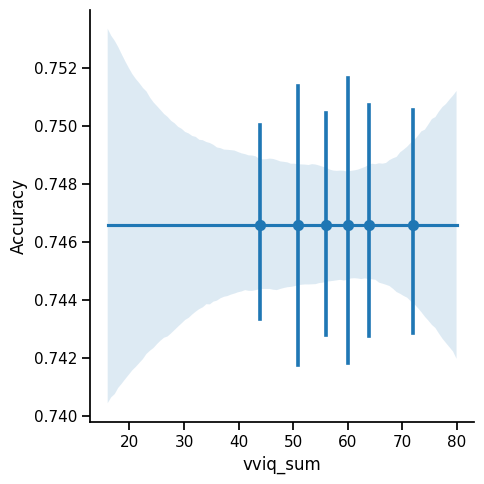

In [596]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='vviq_sum',
    y='Accuracy',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

plt.show()

<Figure size 1000x600 with 0 Axes>

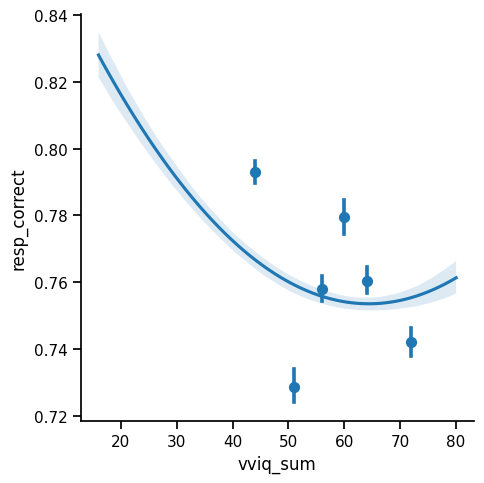

In [594]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='vviq_sum',
    y='resp_correct',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

plt.show()

<Figure size 1000x600 with 0 Axes>

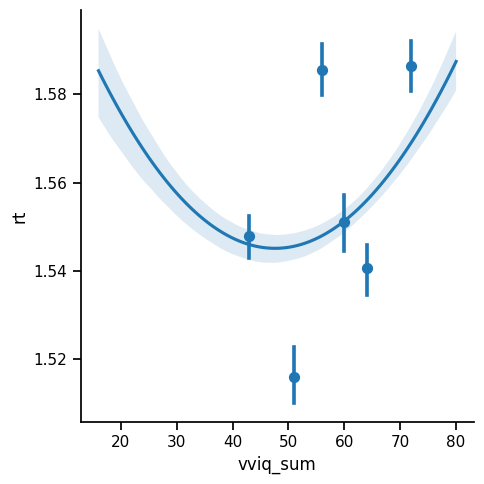

In [592]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='vviq_sum',
    y='rt',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

plt.show()

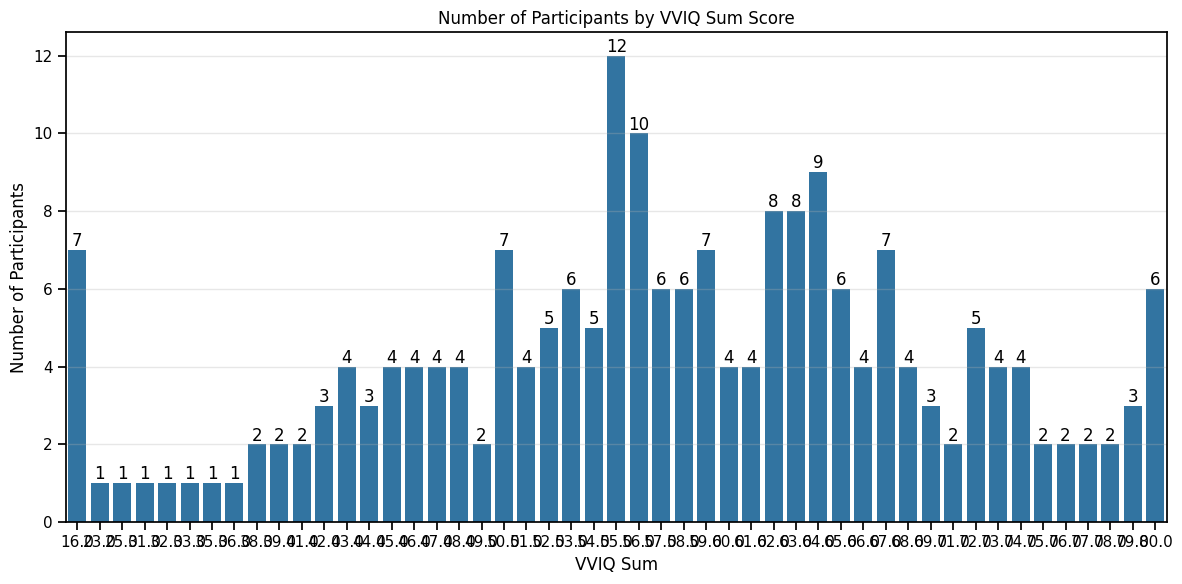

In [606]:
participant_vviq = df.groupby('participant')['vviq_sum'].first().reset_index()

# Create a count of participants for each vviq_sum value
vviq_counts = participant_vviq['vviq_sum'].value_counts().sort_index().reset_index()
vviq_counts.columns = ['vviq_sum', 'participant_count']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=vviq_counts, x='vviq_sum', y='participant_count')

# Add labels and title
plt.title('Number of Participants by VVIQ Sum Score')
plt.xlabel('VVIQ Sum')
plt.ylabel('Number of Participants')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of each bar
for i, count in enumerate(vviq_counts['participant_count']):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()


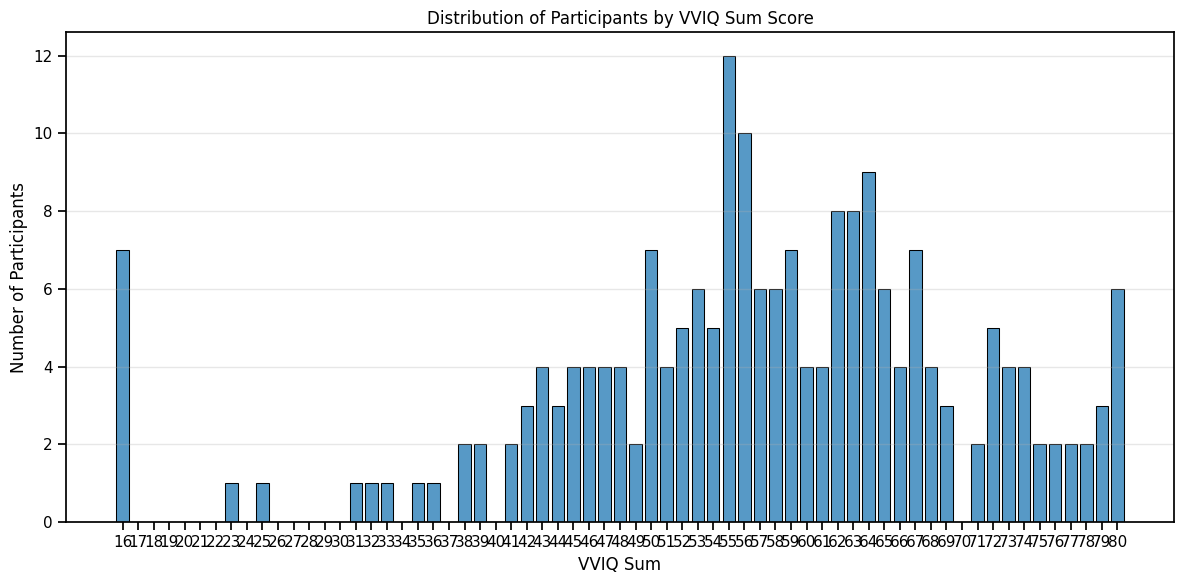

In [607]:

# Alternative: Create a histogram with integer bins
plt.figure(figsize=(12, 6))
sns.histplot(data=participant_vviq, x='vviq_sum', discrete=True, shrink=0.8)

plt.title('Distribution of Participants by VVIQ Sum Score')
plt.xlabel('VVIQ Sum')
plt.ylabel('Number of Participants')
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(int(participant_vviq['vviq_sum'].min()), 
                int(participant_vviq['vviq_sum'].max()) + 1))
plt.tight_layout()
plt.show()

In [610]:
vviq_counts

vviq_sum  participant_count
0       16.0                  7
1       23.0                  1
2       25.0                  1
3       31.0                  1
4       32.0                  1
5       33.0                  1
6       35.0                  1
7       36.0                  1
8       38.0                  2
9       39.0                  2
10      41.0                  2
11      42.0                  3
12      43.0                  4
13      44.0                  3
14      45.0                  4
15      46.0                  4
16      47.0                  4
17      48.0                  4
18      49.0                  2
19      50.0                  7
20      51.0                  4
21      52.0                  5
22      53.0                  6
23      54.0                  5
24      55.0                 12
25      56.0                 10
26      57.0                  6
27      58.0                  6
28      59.0                  7
29      60.0                  4
30      61.0                  4
31      62.0                  8
32      63.0                  8
33      64.0                  9
34      65.0                  6
35      66.0                  4
36      67.0                  7
37      68.0                  4
38      69.0                  3
39      71.0                  2
40      72.0                  5
41      73.0                  4
42      74.0                  4
43      75.0                  2
44      76.0                  2
45      77.0                  2
46      78.0                  2
47      79.0                  3
48      80.0                  6

In [603]:
df['Accuracy'].head(5000)

0       0.826594
1       0.826594
2       0.826594
3       0.826594
4       0.826594
          ...   
4995    0.116594
4996    1.116594
4997    0.116594
4998    1.116594
4999    1.116594
Name: Accuracy, Length: 5000, dtype: float64

Creating basic CNN architecture...
Creating enhanced CNN architecture...


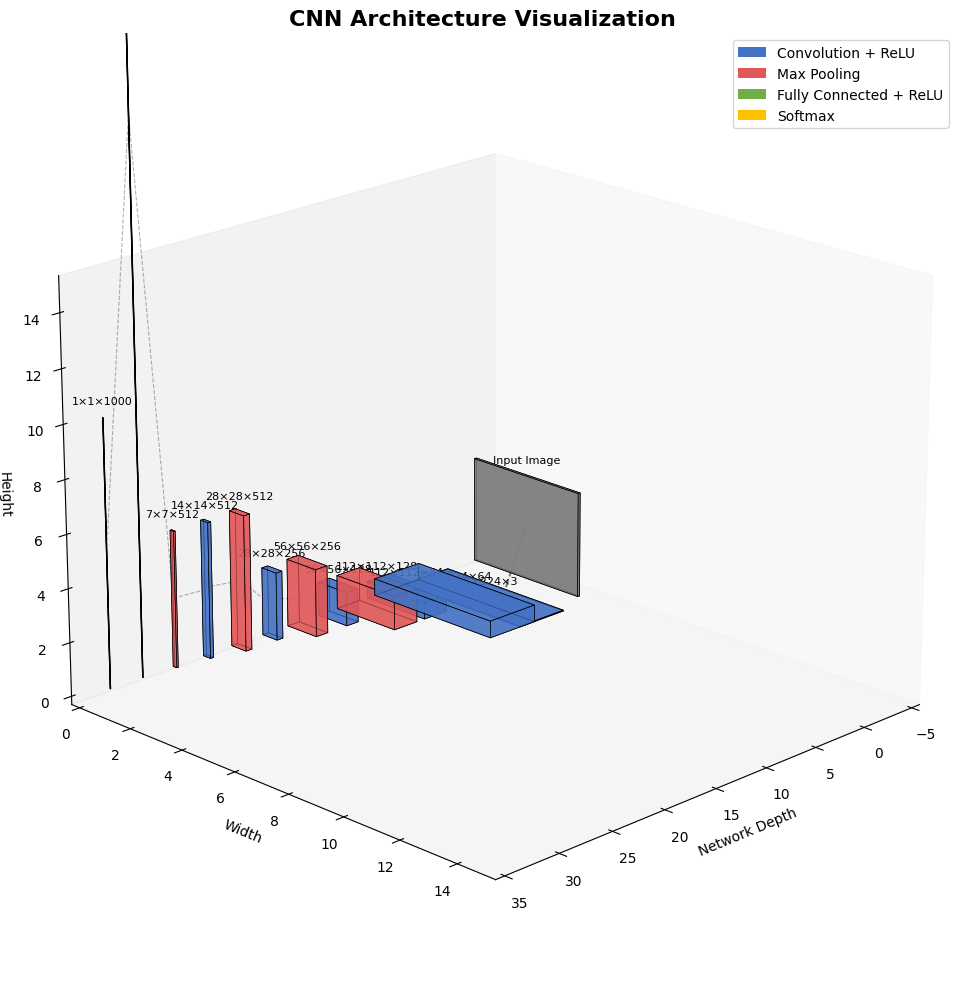

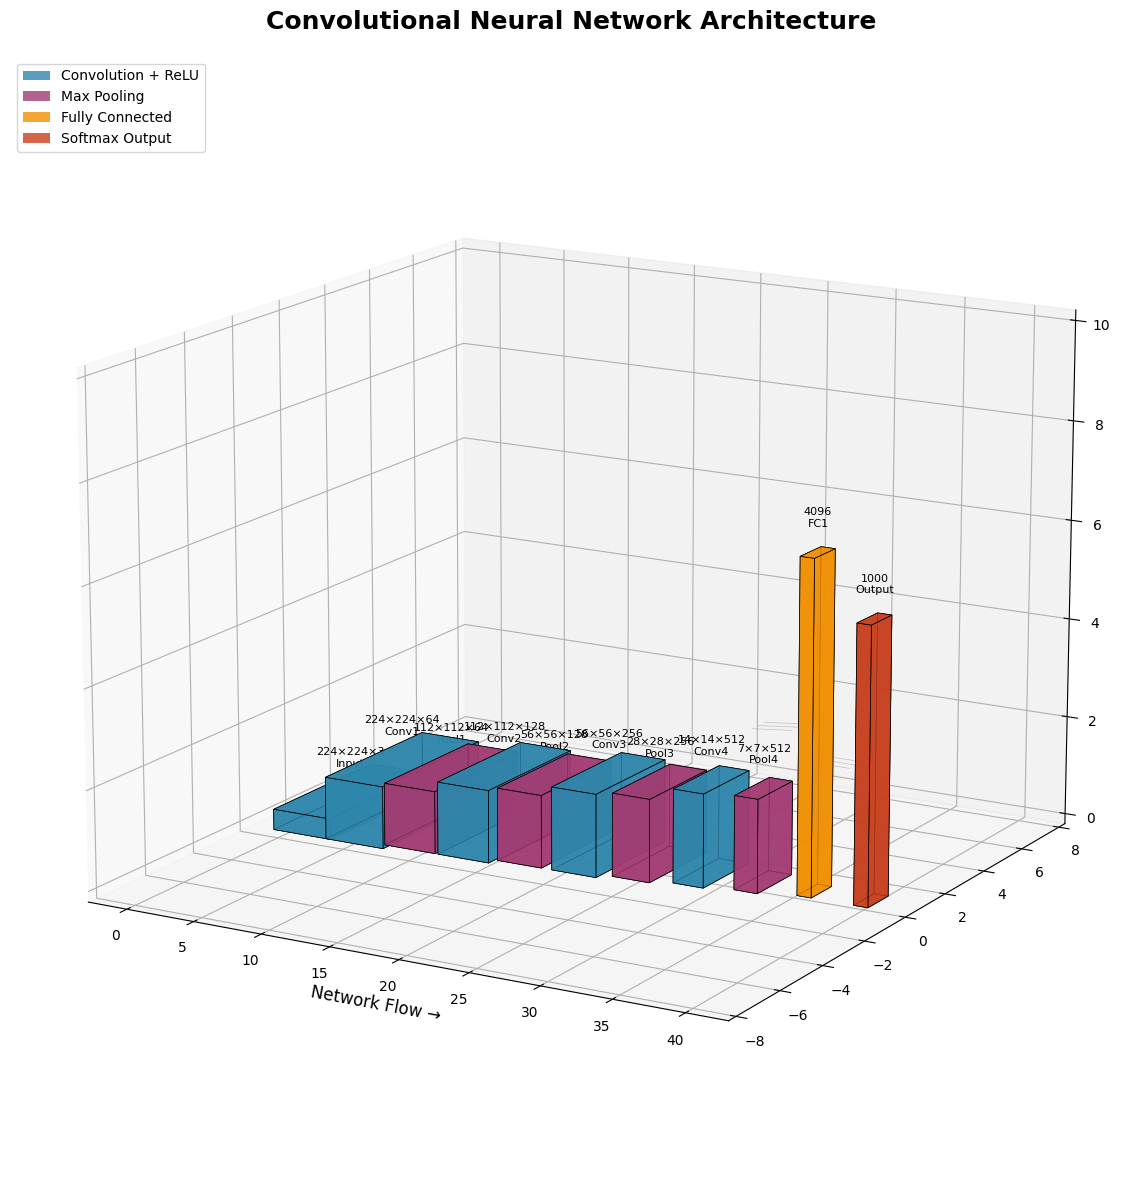